# Import packages

First thing first: import my packages. I always import pandas, numpy, and matplotlib.pyplot at the beginning of every notebook I write, because I know I will need to use them very soon.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Other packages will be added later as I go with the analysis. For example, I need tensorflow for modeling, I will import tensorflow in a separated code cell right before the step of building the model. Then I might go back and move the importing cells up here and reorganize them after I am done with everything.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from scipy import stats

# Import data

Second thing second: import my data. I usually upload the file directly if it is small enough. Otherwise, I will upload it on to a cloud drive then add a connection. This file is small, so I upload it directly, hence the one-line code for importing data. Connecting to a drive will need longer code for sure (and probably some authentication steps and troubleshooting).

In [ ]:
df = pd.read_csv('salaries.csv')

# Explore the basics

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,US,M
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,ES,L
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,IN,M
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,DE,M
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   job_title_recode    16534 non-null  object
 5   salary              16534 non-null  int64 
 6   salary_currency     16534 non-null  object
 7   salary_in_usd       16534 non-null  int64 
 8   employee_residence  16534 non-null  object
 9   remote_ratio        16534 non-null  int64 
 10  company_location    16534 non-null  object
 11  company_size        16534 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.5+ MB


## The target variable: Salary in USD

In [ ]:
df.salary_in_usd.describe()

count     16534.000000
mean     149686.777973
std       68505.293156
min       15000.000000
25%      101125.000000
50%      141300.000000
75%      185900.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

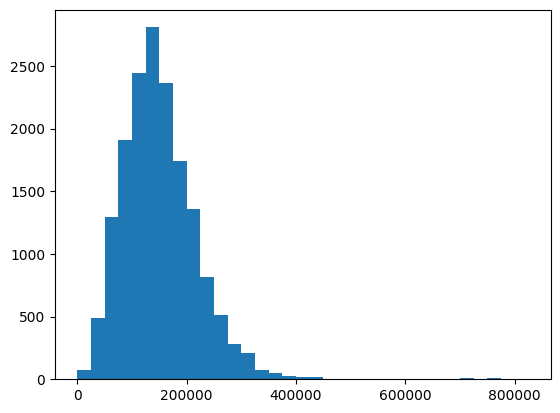

In [ ]:
bins = np.arange(0, 850000, 25000)
df.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

## Work year

In [ ]:
df.work_year.unique()

array([2024, 2022, 2023, 2021, 2020])

In [ ]:
df.work_year.value_counts()

work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64

In [ ]:
df.work_year.value_counts()/16534*100

work_year
2023    51.524132
2024    36.694085
2022    10.009677
2021     1.318495
2020     0.453611
Name: count, dtype: float64

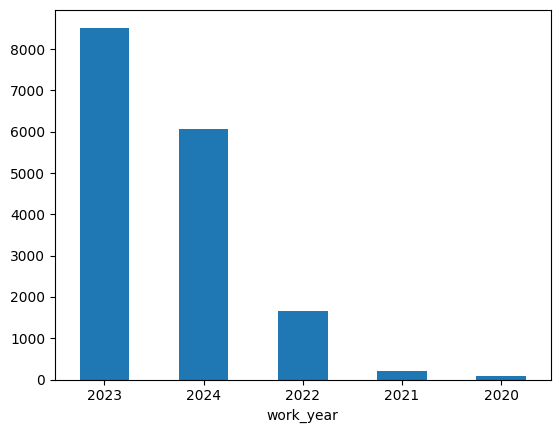

In [ ]:
df.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

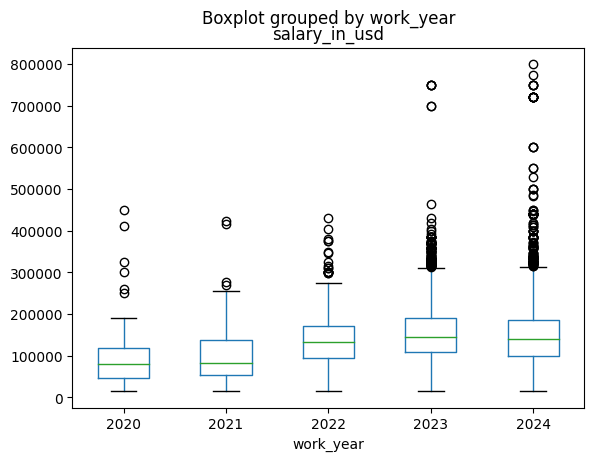

In [ ]:
df.boxplot(by='work_year', column =['salary_in_usd'], grid = False)
plt.show()

## Experience level

In [ ]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
df.experience_level.value_counts()

experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64

In [ ]:
df.experience_level.value_counts()/16534*100

experience_level
SE    64.533688
MI    24.422402
EN     8.013790
EX     3.030120
Name: count, dtype: float64

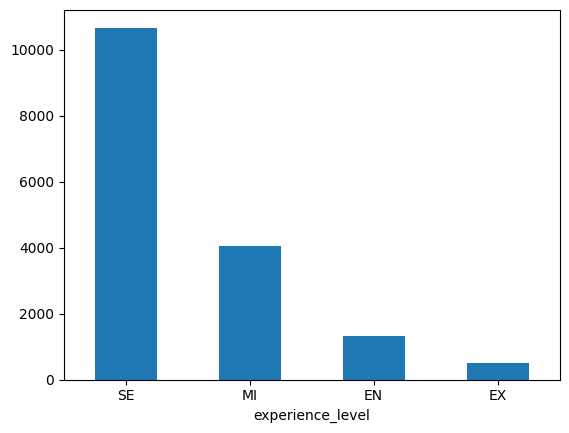

In [ ]:
df.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

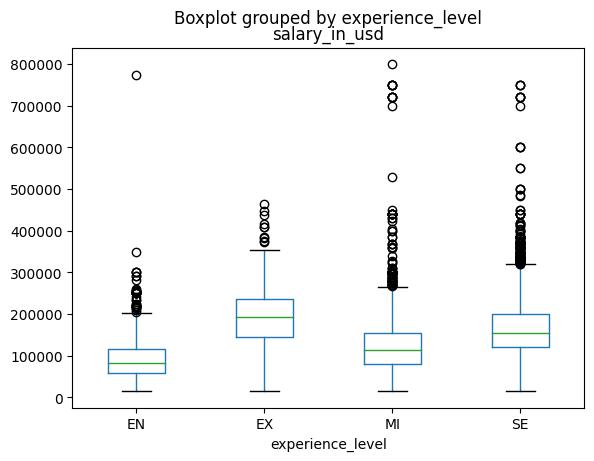

In [ ]:
df.boxplot(by='experience_level', column =['salary_in_usd'], grid = False)
plt.show()

## Employment type

In [ ]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
df.employment_type.value_counts()

employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [ ]:
df.employment_type.value_counts()/16534*100

employment_type
FT    99.516149
PT     0.229829
CT     0.169348
FL     0.084674
Name: count, dtype: float64

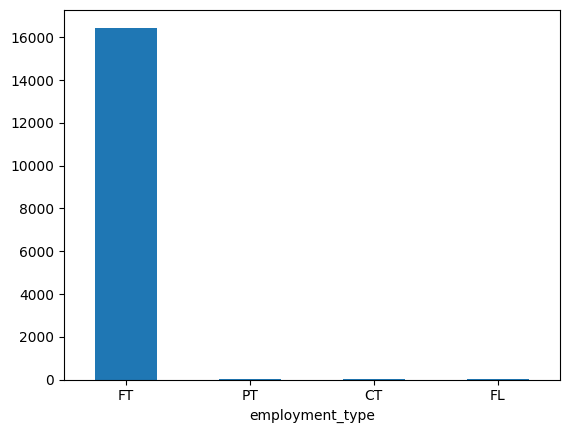

In [ ]:
df.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

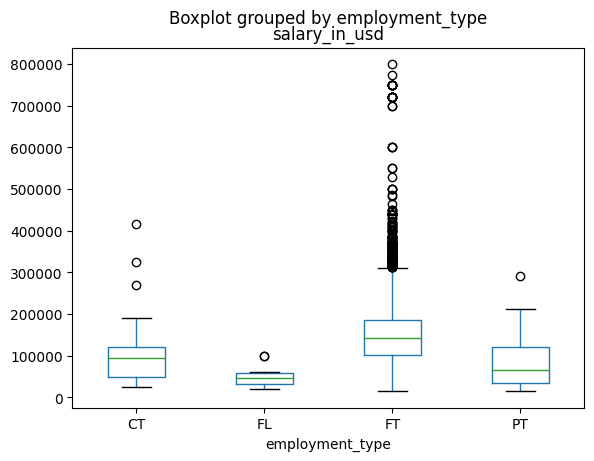

In [ ]:
df.boxplot(by='employment_type', column =['salary_in_usd'], grid = False)
plt.show()

## Job Title

In [ ]:
df.job_title.unique()

array(['Admin & Data Analyst', 'AI Architect', 'AI Developer',
       'AI Engineer', 'AI Product Manager', 'AI Programmer',
       'AI Research Engineer', 'AI Research Scientist', 'AI Scientist',
       'AI Software Engineer', 'Analytics Engineer',
       'Analytics Engineering Manager', 'Applied Data Scientist',
       'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Research Scientist',
       'Applied Scientist', 'Autonomous Vehicle Technician',
       'AWS Data Architect', 'Azure Data Engineer', 'Bear Robotics',
       'BI Analyst', 'BI Data Analyst', 'BI Data Engineer',
       'BI Developer', 'Big Data Architect', 'Big Data Developer',
       'Big Data Engineer', 'Business Data Analyst',
       'Business Intelligence', 'Business Intelligence Analyst',
       'Business Intelligence Data Analyst',
       'Business Intelligence Developer',
       'Business Intelligence Engineer', 'Business Intelligence Lead',
       'Business Intelligence Man

In [ ]:
df.job_title.unique().size

155

In [ ]:
job_title = pd.DataFrame(df.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

,count
job_title,
Data Engineer,3464
Data Scientist,3314
Data Analyst,2440
Machine Learning Engineer,1705
Research Scientist,531
Data Architect,435
Applied Scientist,435
Analytics Engineer,431
Research Engineer,306


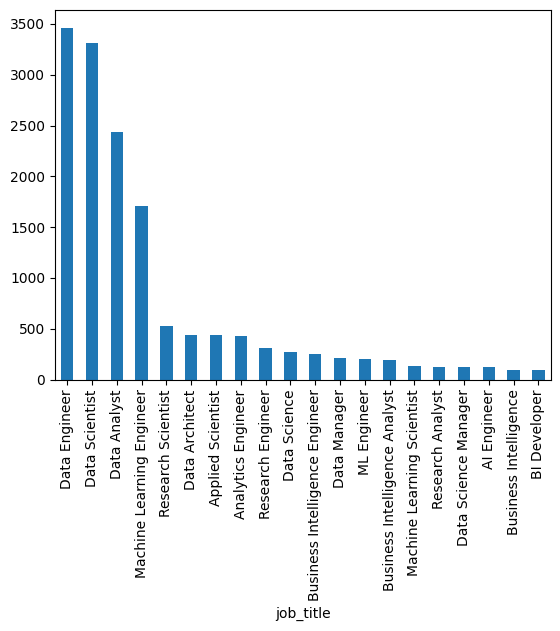

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Recode and re-explore Job title

In [ ]:
df.job_title_recode.unique()

array(['Analyst', 'Architect', 'Developer', 'Engineer', 'Product Manager',
       'Scientist', 'Manager', 'Technician', 'Specialist', 'Biologist',
       'Associate', 'Consultant', 'Modeler', 'Practitioner', 'Researcher',
       'Professional'], dtype=object)

In [ ]:
df.job_title_recode.unique().size

16

In [ ]:
df.job_title_recode.value_counts()

job_title_recode
Engineer           6835
Scientist          4797
Analyst            3059
Manager             684
Architect           469
Developer           247
Specialist          186
Consultant           93
Modeler              58
Product Manager      47
Researcher           22
Practitioner         16
Professional          8
Associate             7
Biologist             4
Technician            2
Name: count, dtype: int64

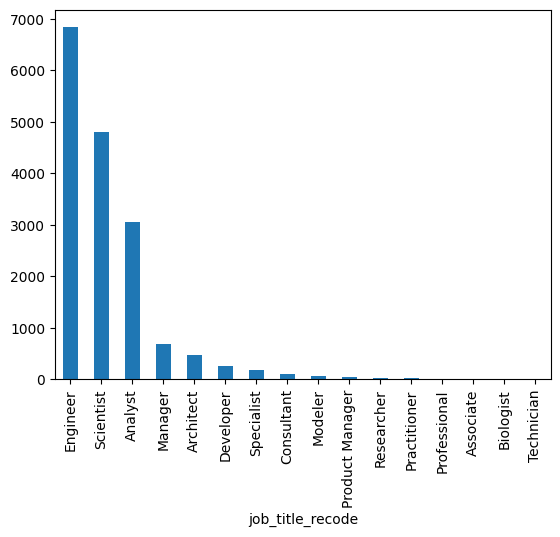

In [ ]:
df.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

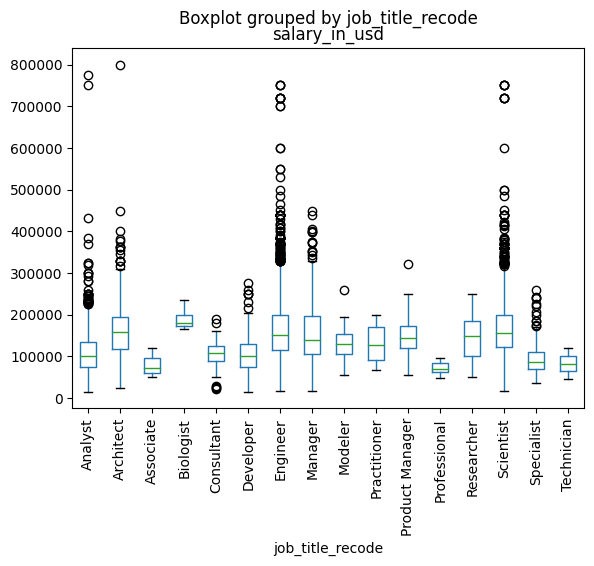

In [ ]:
df.boxplot(by='job_title_recode', column =['salary_in_usd'], grid = False)
plt.xticks(rotation=90)
plt.show()

## Salary currency

In [ ]:
df.salary_currency.unique()

array(['USD', 'EUR', 'SGD', 'ILS', 'GBP', 'INR', 'CAD', 'AUD', 'DKK',
       'BRL', 'TRY', 'HUF', 'PHP', 'PLN', 'NZD', 'CHF', 'MXN', 'JPY',
       'THB', 'NOK', 'HKD', 'CLP', 'ZAR'], dtype=object)

In [ ]:
df.salary_currency.unique().size

23

In [ ]:
df.salary_currency.value_counts()

salary_currency
USD    15294
GBP      616
EUR      449
CAD       56
INR       55
AUD       12
CHF        8
PLN        7
SGD        6
BRL        5
JPY        4
DKK        4
HUF        3
TRY        3
ILS        2
THB        2
NOK        2
PHP        1
NZD        1
MXN        1
HKD        1
CLP        1
ZAR        1
Name: count, dtype: int64

In [ ]:
df.salary_currency.value_counts()/16534*100

salary_currency
USD    92.500302
GBP     3.725656
EUR     2.715616
CAD     0.338696
INR     0.332648
AUD     0.072578
CHF     0.048385
PLN     0.042337
SGD     0.036289
BRL     0.030241
JPY     0.024193
DKK     0.024193
HUF     0.018144
TRY     0.018144
ILS     0.012096
THB     0.012096
NOK     0.012096
PHP     0.006048
NZD     0.006048
MXN     0.006048
HKD     0.006048
CLP     0.006048
ZAR     0.006048
Name: count, dtype: float64

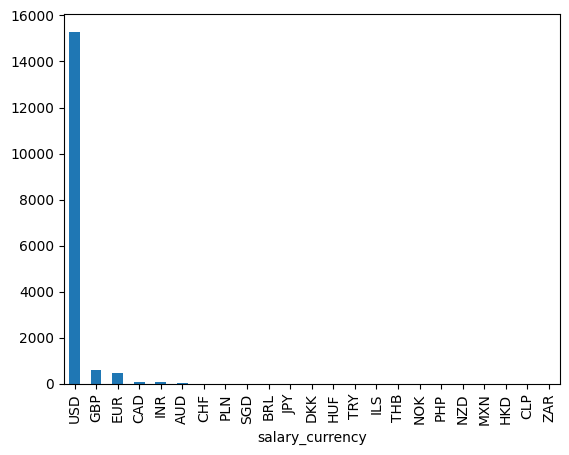

In [ ]:
df.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Employee residence

In [ ]:
df.employee_residence.unique()

array(['US', 'ES', 'IN', 'DE', 'HR', 'CA', 'BE', 'FR', 'UA', 'IT', 'FI',
       'SE', 'BA', 'IL', 'GB', 'AE', 'OM', 'CZ', 'PT', 'RO', 'QA', 'KR',
       'PK', 'TN', 'SA', 'TR', 'AU', 'GH', 'CO', 'DK', 'EG', 'LT', 'HU',
       'NL', 'NG', 'BR', 'AR', 'KE', 'AT', 'BO', 'VN', 'PL', 'AS', 'MU',
       'PH', 'MX', 'MD', 'AM', 'LU', 'ZA', 'LV', 'SG', 'RU', 'GE', 'GR',
       'IE', 'SI', 'EE', 'CF', 'UZ', 'KW', 'CN', 'CR', 'ID', 'BG', 'NZ',
       'MT', 'CH', 'PE', 'PR', 'JP', 'HK', 'LB', 'TH', 'AD', 'EC', 'NO',
       'CY', 'DO', 'DZ', 'RS', 'CL', 'MY', 'IQ', 'UG', 'IR', 'HN', 'JE'],
      dtype=object)

In [ ]:
df.employee_residence.unique().size

88

In [ ]:
employee_residence = pd.DataFrame(df.employee_residence.value_counts().copy())

In [ ]:
top_employee_residence = employee_residence.head(20)

In [ ]:
top_employee_residence

,count
employee_residence,
US,14467
GB,686
CA,453
ES,137
DE,98
IN,78
FR,69
AU,54
NL,32


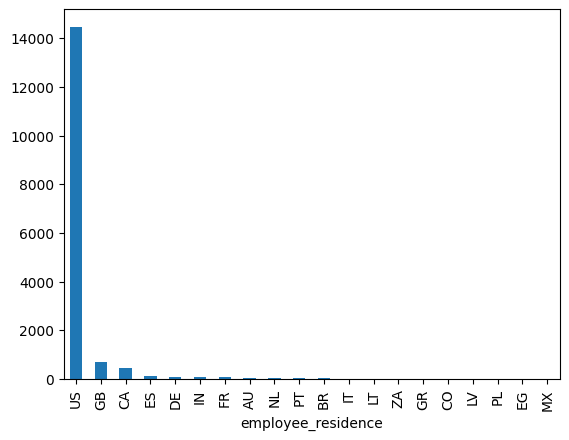

In [ ]:
top_employee_residence.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Remote ratio

In [ ]:
df.remote_ratio.unique()

array([  0, 100,  50])

In [ ]:
df.remote_ratio.value_counts()

remote_ratio
0      11118
100     5167
50       249
Name: count, dtype: int64

In [ ]:
df.remote_ratio.value_counts()/16534*100

remote_ratio
0      67.243256
100    31.250756
50      1.505988
Name: count, dtype: float64

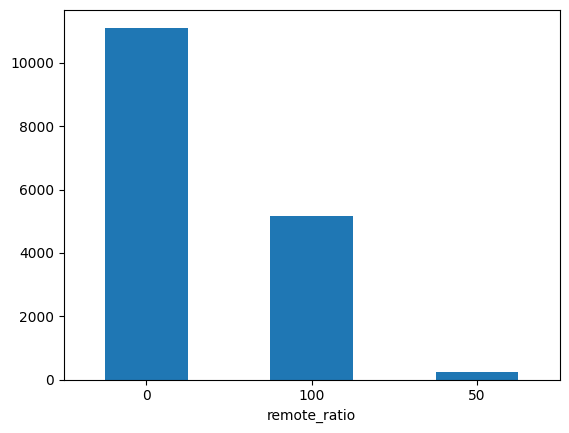

In [ ]:
df.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

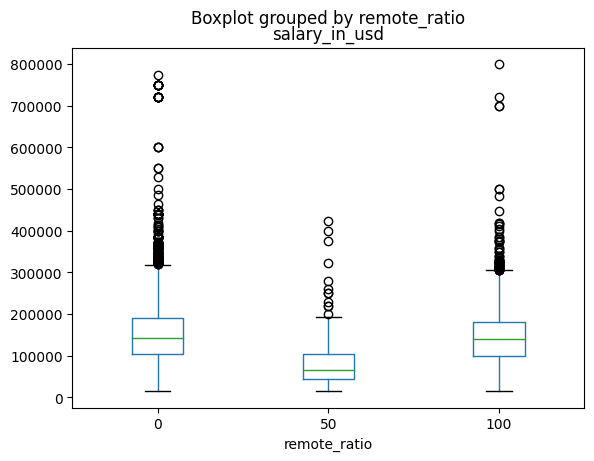

In [ ]:
df.boxplot(by='remote_ratio', column =['salary_in_usd'], grid = False)
plt.show()

## Company location

In [ ]:
df.company_location.unique()

array(['US', 'ES', 'IN', 'DE', 'CA', 'FR', 'UA', 'IT', 'FI', 'SE', 'BA',
       'IL', 'GB', 'AE', 'OM', 'PT', 'RO', 'QA', 'KR', 'AU', 'HU', 'CH',
       'SA', 'TR', 'GH', 'CO', 'DK', 'AS', 'EG', 'LT', 'NL', 'NG', 'BR',
       'KE', 'PK', 'AT', 'CZ', 'PL', 'BS', 'MU', 'PH', 'JP', 'MX', 'MD',
       'GI', 'RU', 'LU', 'ZA', 'LV', 'SG', 'IE', 'SI', 'EE', 'CF', 'HR',
       'AR', 'ID', 'GR', 'NZ', 'MT', 'PR', 'LB', 'TH', 'AD', 'EC', 'NO',
       'HK', 'BE', 'MY', 'DZ', 'CL', 'IQ', 'VN', 'AM', 'IR', 'HN', 'CN'],
      dtype=object)

In [ ]:
df.company_location.unique().size

77

In [ ]:
company_location = pd.DataFrame(df.company_location.value_counts().copy())

In [ ]:
top_company_location = company_location.head(20)

In [ ]:
top_company_location

,count
company_location,
US,14518
GB,694
CA,455
ES,133
DE,105
FR,65
IN,63
AU,57
NL,32


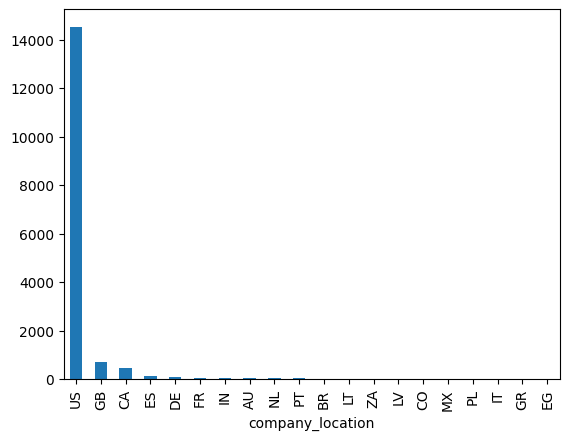

In [ ]:
top_company_location.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Company size

In [ ]:
df.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
df.company_size.value_counts()

company_size
M    15306
L     1040
S      188
Name: count, dtype: int64

In [ ]:
df.company_size.value_counts()/16534*100

company_size
M    92.572880
L     6.290069
S     1.137051
Name: count, dtype: float64

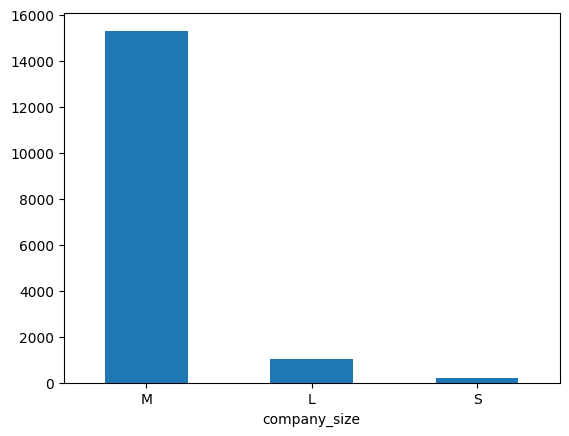

In [ ]:
df.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

# Focus on the Outliers

In [ ]:
mean = df.salary_in_usd.mean()

In [ ]:
mean

149686.77797266238

In [ ]:
std = df.salary_in_usd.std()

In [ ]:
std

68505.2931563436

In [ ]:
alpha = 3

In [ ]:
higher = mean + alpha*std

In [ ]:
higher

355202.6574416932

In [ ]:
high_outlier = df[df.salary_in_usd > higher].copy()

In [ ]:
high_outlier.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7,2024,SE,FT,AI Architect,Architect,449000,USD,449000,US,0,US,M
9,2024,MI,FT,AI Architect,Architect,800000,USD,800000,CA,100,CA,M
95,2024,SE,FT,AI Engineer,Engineer,385000,USD,385000,US,0,US,M
101,2024,MI,FT,AI Engineer,Engineer,400000,USD,400000,US,0,US,M
144,2023,SE,FT,AI Engineer,Engineer,372000,USD,372000,US,0,US,M


In [ ]:
high_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 7 to 16494
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           138 non-null    int64 
 1   experience_level    138 non-null    object
 2   employment_type     138 non-null    object
 3   job_title           138 non-null    object
 4   job_title_recode    138 non-null    object
 5   salary              138 non-null    int64 
 6   salary_currency     138 non-null    object
 7   salary_in_usd       138 non-null    int64 
 8   employee_residence  138 non-null    object
 9   remote_ratio        138 non-null    int64 
 10  company_location    138 non-null    object
 11  company_size        138 non-null    object
dtypes: int64(4), object(8)
memory usage: 14.0+ KB


## Salary in USD

In [ ]:
high_outlier.salary_in_usd.describe()

count       138.000000
mean     456121.695652
std      128876.792807
min      357900.000000
25%      370000.000000
50%      399940.000000
75%      449750.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

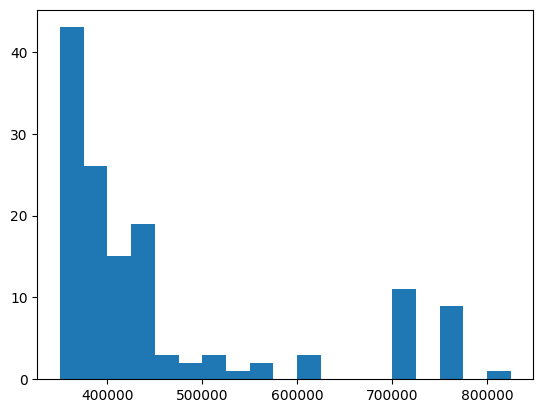

In [ ]:
bins = np.arange(350000, 850000, 25000)
high_outlier.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

In [ ]:
df[df.salary_in_usd > 700000].copy()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
9,2024,MI,FT,AI Architect,Architect,800000,USD,800000,CA,100,CA,M
225,2024,SE,FT,Analytics Engineer,Engineer,720000,USD,720000,US,0,US,M
309,2024,MI,FT,Analytics Engineer,Engineer,720000,USD,720000,US,0,US,M
323,2024,SE,FT,Analytics Engineer,Engineer,720000,USD,720000,US,0,US,M
339,2024,SE,FT,Analytics Engineer,Engineer,750000,USD,750000,US,0,US,M
2555,2024,EN,FT,Data Analyst,Analyst,774000,USD,774000,MX,0,MX,M
2755,2024,SE,FT,Data Analyst,Analyst,750000,USD,750000,US,0,US,M
6365,2023,MI,FT,Data Engineer,Engineer,750000,USD,750000,US,0,US,M
9996,2024,SE,FT,Data Scientist,Scientist,720000,USD,720000,US,100,US,M
10387,2024,SE,FT,Data Scientist,Scientist,720000,USD,720000,US,0,US,M


## Work year

In [ ]:
high_outlier.work_year.unique()

array([2024, 2023, 2022, 2021, 2020])

In [ ]:
high_outlier.work_year.value_counts()

work_year
2024    77
2023    52
2022     5
2021     2
2020     2
Name: count, dtype: int64

In [ ]:
high_outlier.work_year.value_counts()/138*100

work_year
2024    55.797101
2023    37.681159
2022     3.623188
2021     1.449275
2020     1.449275
Name: count, dtype: float64

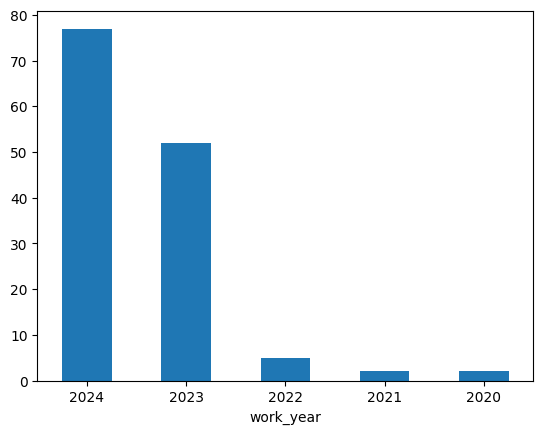

In [ ]:
high_outlier.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Experience level

In [ ]:
high_outlier.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [ ]:
high_outlier.experience_level.value_counts()

experience_level
SE    91
MI    36
EX    10
EN     1
Name: count, dtype: int64

In [ ]:
high_outlier.experience_level.value_counts()/138*100

experience_level
SE    65.942029
MI    26.086957
EX     7.246377
EN     0.724638
Name: count, dtype: float64

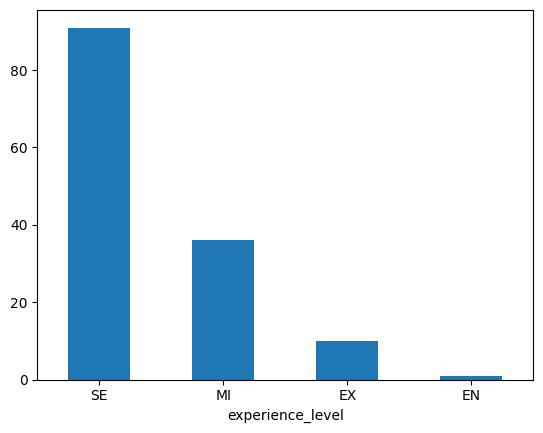

In [ ]:
high_outlier.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Employment type

In [ ]:
high_outlier.employment_type.unique()

array(['FT', 'CT'], dtype=object)

In [ ]:
high_outlier.employment_type.value_counts()

employment_type
FT    137
CT      1
Name: count, dtype: int64

In [ ]:
high_outlier.employment_type.value_counts()/138*100

employment_type
FT    99.275362
CT     0.724638
Name: count, dtype: float64

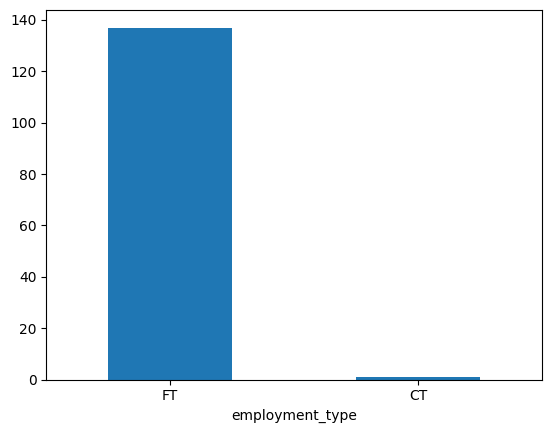

In [ ]:
high_outlier.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Job Title

In [ ]:
high_outlier.job_title.unique()

array(['AI Architect', 'AI Engineer', 'AI Scientist',
       'Analytics Engineer', 'Analytics Engineering Manager',
       'Applied Data Scientist', 'Applied Machine Learning Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Analytics Lead',
       'Data Architect', 'Data Engineer', 'Data Infrastructure Engineer',
       'Data Science', 'Data Science Tech Lead', 'Data Scientist',
       'Director of Data Science', 'Head of Machine Learning',
       'Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Software Engineer', 'ML Engineer',
       'Principal Data Scientist', 'Prompt Engineer', 'Research Engineer',
       'Research Scientist'], dtype=object)

In [ ]:
high_outlier.job_title.unique().size

26

In [ ]:
job_title = pd.DataFrame(high_outlier.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

,count
job_title,
Research Scientist,21
Research Engineer,19
Data Scientist,19
Machine Learning Engineer,15
Analytics Engineer,9
ML Engineer,7
Data Engineer,7
Data Architect,6
AI Engineer,5


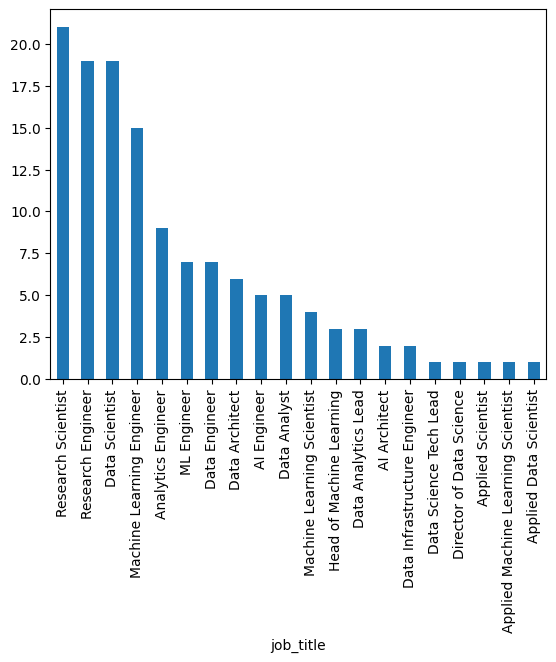

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Recoded Job title

In [ ]:
high_outlier.job_title_recode.unique()

array(['Architect', 'Engineer', 'Scientist', 'Manager', 'Analyst'],
      dtype=object)

In [ ]:
high_outlier.job_title_recode.value_counts()

job_title_recode
Engineer     66
Scientist    50
Manager       9
Architect     8
Analyst       5
Name: count, dtype: int64

In [ ]:
high_outlier.job_title_recode.value_counts()/138*100

job_title_recode
Engineer     47.826087
Scientist    36.231884
Manager       6.521739
Architect     5.797101
Analyst       3.623188
Name: count, dtype: float64

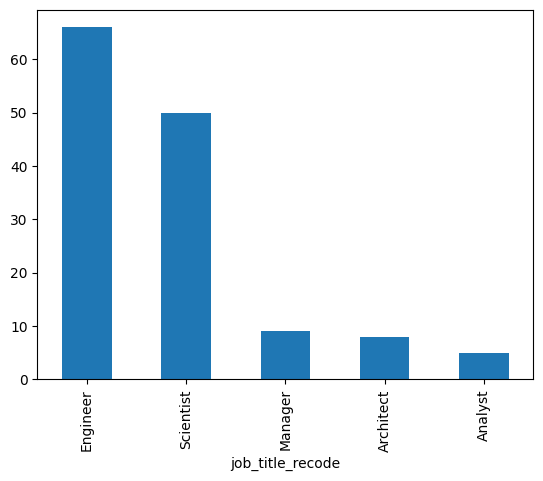

In [ ]:
high_outlier.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Salary currency

In [ ]:
high_outlier.salary_currency.unique()

array(['USD', 'GBP', 'ILS'], dtype=object)

In [ ]:
high_outlier.salary_currency.value_counts()

salary_currency
USD    131
GBP      6
ILS      1
Name: count, dtype: int64

In [ ]:
high_outlier.salary_currency.value_counts()/138*100

salary_currency
USD    94.927536
GBP     4.347826
ILS     0.724638
Name: count, dtype: float64

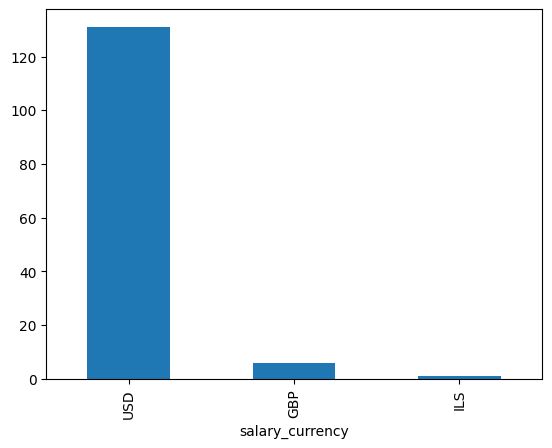

In [ ]:
high_outlier.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Employee residence

In [ ]:
high_outlier.employee_residence.unique()

array(['US', 'CA', 'GB', 'IL', 'MX'], dtype=object)

In [ ]:
high_outlier.employee_residence.value_counts()

employee_residence
US    129
GB      6
CA      1
IL      1
MX      1
Name: count, dtype: int64

In [ ]:
high_outlier.employee_residence.value_counts()/138*100

employee_residence
US    93.478261
GB     4.347826
CA     0.724638
IL     0.724638
MX     0.724638
Name: count, dtype: float64

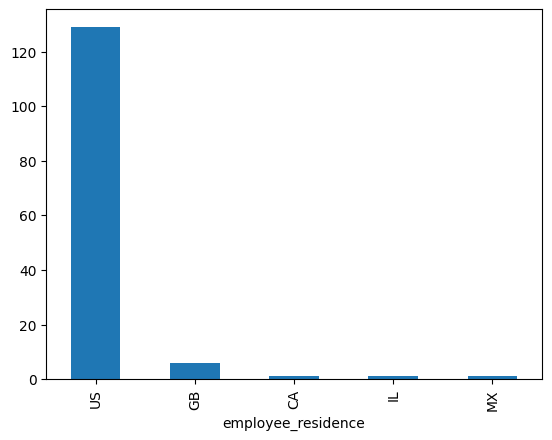

In [ ]:
high_outlier.employee_residence.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Remote ratio

In [ ]:
high_outlier.remote_ratio.unique()

array([  0, 100,  50])

In [ ]:
high_outlier.remote_ratio.value_counts()

remote_ratio
0      112
100     23
50       3
Name: count, dtype: int64

In [ ]:
high_outlier.remote_ratio.value_counts()/138*100

remote_ratio
0      81.159420
100    16.666667
50      2.173913
Name: count, dtype: float64

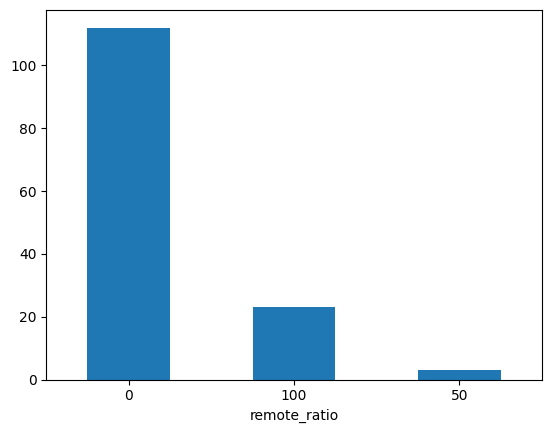

In [ ]:
high_outlier.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Company location

In [ ]:
high_outlier.company_location.unique()

array(['US', 'CA', 'GB', 'IL', 'MX'], dtype=object)

In [ ]:
high_outlier.company_location.value_counts()

company_location
US    129
GB      6
CA      1
IL      1
MX      1
Name: count, dtype: int64

In [ ]:
high_outlier.company_location.value_counts()/138*100

company_location
US    93.478261
GB     4.347826
CA     0.724638
IL     0.724638
MX     0.724638
Name: count, dtype: float64

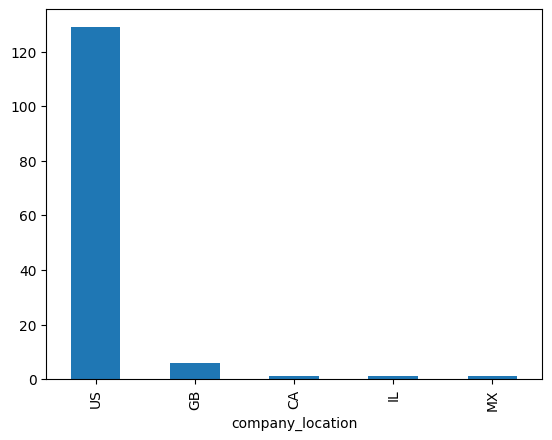

In [ ]:
high_outlier.company_location.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Company size

In [ ]:
high_outlier.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
high_outlier.company_size.value_counts()

company_size
M    129
L      8
S      1
Name: count, dtype: int64

In [ ]:
high_outlier.company_size.value_counts()/138*100

company_size
M    93.478261
L     5.797101
S     0.724638
Name: count, dtype: float64

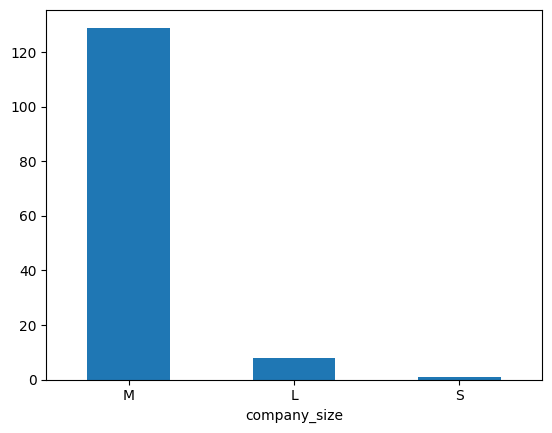

In [ ]:
high_outlier.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

# Exclude the Outliers

In [ ]:
df_clean = df[df.salary_in_usd <= higher].copy()

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,US,M
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,ES,L
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,IN,M
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,DE,M
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,US,M


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16396 entries, 0 to 16533
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16396 non-null  int64 
 1   experience_level    16396 non-null  object
 2   employment_type     16396 non-null  object
 3   job_title           16396 non-null  object
 4   job_title_recode    16396 non-null  object
 5   salary              16396 non-null  int64 
 6   salary_currency     16396 non-null  object
 7   salary_in_usd       16396 non-null  int64 
 8   employee_residence  16396 non-null  object
 9   remote_ratio        16396 non-null  int64 
 10  company_location    16396 non-null  object
 11  company_size        16396 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.6+ MB


## Salary in USD

In [ ]:
df_clean.salary_in_usd.describe()

count     16396.000000
mean     147107.611186
std       61616.875093
min       15000.000000
25%      100186.000000
50%      140100.000000
75%      185000.000000
max      355000.000000
Name: salary_in_usd, dtype: float64

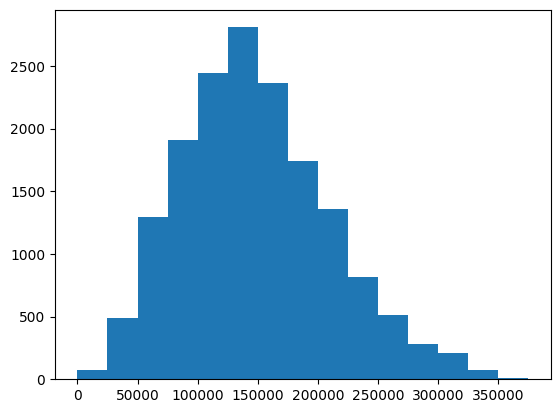

In [ ]:
bins = np.arange(0, 400000, 25000)
df_clean.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

## Work year

In [ ]:
df_clean.work_year.unique()

array([2024, 2022, 2023, 2021, 2020])

In [ ]:
df_clean.work_year.value_counts()

work_year
2023    8467
2024    5990
2022    1650
2021     216
2020      73
Name: count, dtype: int64

In [ ]:
df_clean.work_year.value_counts()/16396*100

work_year
2023    51.640644
2024    36.533301
2022    10.063430
2021     1.317394
2020     0.445231
Name: count, dtype: float64

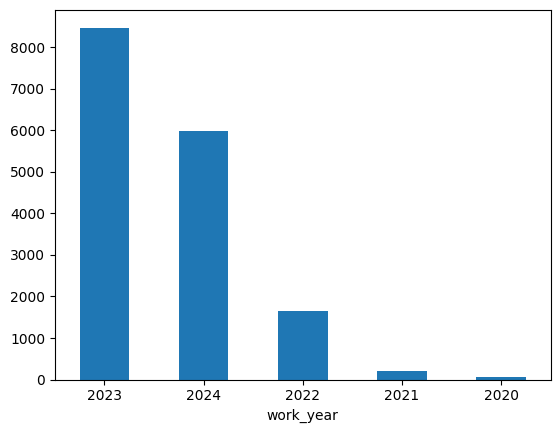

In [ ]:
df_clean.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Experience level

In [ ]:
df_clean.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
df_clean.experience_level.value_counts()

experience_level
SE    10579
MI     4002
EN     1324
EX      491
Name: count, dtype: int64

In [ ]:
df_clean.experience_level.value_counts()/16396*100

experience_level
SE    64.521835
MI    24.408392
EN     8.075140
EX     2.994633
Name: count, dtype: float64

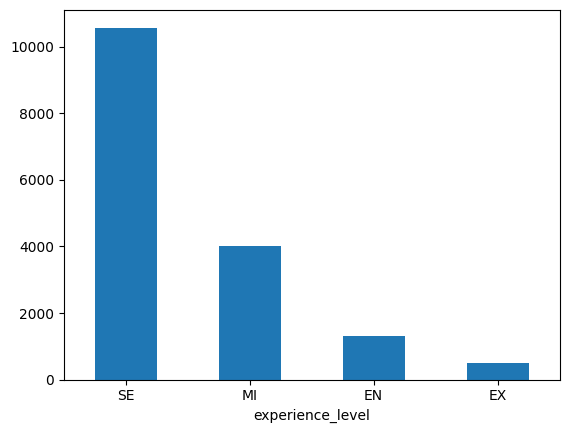

In [ ]:
df_clean.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Employment type

In [ ]:
df_clean.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
df_clean.employment_type.value_counts()

employment_type
FT    16317
PT       38
CT       27
FL       14
Name: count, dtype: int64

In [ ]:
df_clean.employment_type.value_counts()/16396*100

employment_type
FT    99.518175
PT     0.231764
CT     0.164674
FL     0.085387
Name: count, dtype: float64

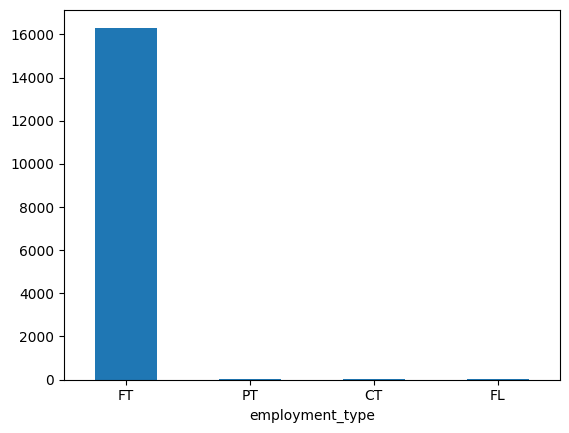

In [ ]:
df_clean.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Job Title

In [ ]:
df_clean.job_title.unique()

array(['Admin & Data Analyst', 'AI Architect', 'AI Developer',
       'AI Engineer', 'AI Product Manager', 'AI Programmer',
       'AI Research Engineer', 'AI Research Scientist', 'AI Scientist',
       'AI Software Engineer', 'Analytics Engineer',
       'Applied Data Scientist', 'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Research Scientist',
       'Applied Scientist', 'Autonomous Vehicle Technician',
       'AWS Data Architect', 'Azure Data Engineer', 'Bear Robotics',
       'BI Analyst', 'BI Data Analyst', 'BI Data Engineer',
       'BI Developer', 'Big Data Architect', 'Big Data Developer',
       'Big Data Engineer', 'Business Data Analyst',
       'Business Intelligence', 'Business Intelligence Analyst',
       'Business Intelligence Data Analyst',
       'Business Intelligence Developer',
       'Business Intelligence Engineer', 'Business Intelligence Lead',
       'Business Intelligence Manager',
       'Business Intelligence Spe

In [ ]:
df_clean.job_title.unique().size

153

In [ ]:
job_title = pd.DataFrame(df_clean.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

,count
job_title,
Data Engineer,3457
Data Scientist,3295
Data Analyst,2435
Machine Learning Engineer,1690
Research Scientist,510
Applied Scientist,434
Data Architect,429
Analytics Engineer,422
Research Engineer,287


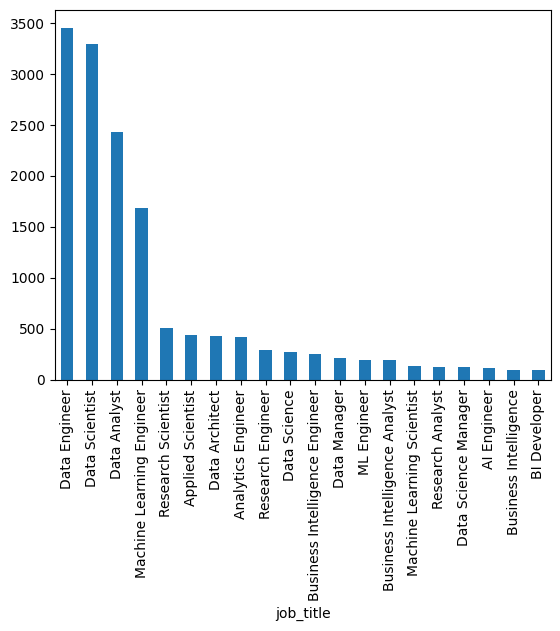

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Recoded Job title

In [ ]:
df_clean.job_title_recode.unique()

array(['Analyst', 'Architect', 'Developer', 'Engineer', 'Product Manager',
       'Scientist', 'Technician', 'Manager', 'Specialist', 'Biologist',
       'Associate', 'Consultant', 'Modeler', 'Practitioner', 'Researcher',
       'Professional'], dtype=object)

In [ ]:
df_clean.job_title_recode.value_counts()

job_title_recode
Engineer           6769
Scientist          4747
Analyst            3054
Manager             675
Architect           461
Developer           247
Specialist          186
Consultant           93
Modeler              58
Product Manager      47
Researcher           22
Practitioner         16
Professional          8
Associate             7
Biologist             4
Technician            2
Name: count, dtype: int64

In [ ]:
df_clean.job_title_recode.value_counts()/16396*100

job_title_recode
Engineer           41.284460
Scientist          28.952183
Analyst            18.626494
Manager             4.116858
Architect           2.811661
Developer           1.506465
Specialist          1.134423
Consultant          0.567212
Modeler             0.353745
Product Manager     0.286655
Researcher          0.134179
Practitioner        0.097585
Professional        0.048792
Associate           0.042693
Biologist           0.024396
Technician          0.012198
Name: count, dtype: float64

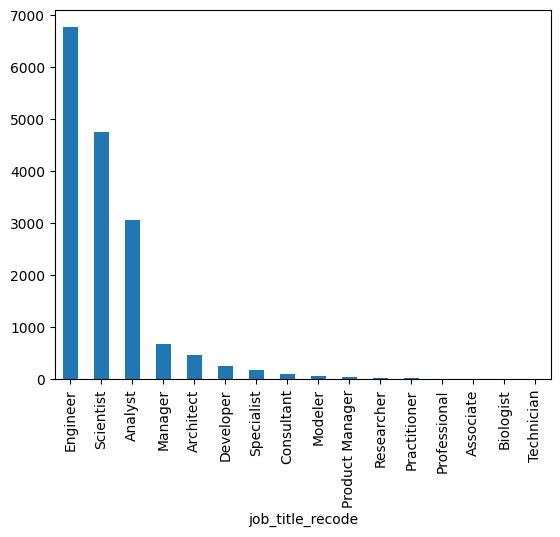

In [ ]:
df_clean.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Salary currency

In [ ]:
df_clean.salary_currency.unique()

array(['USD', 'EUR', 'SGD', 'ILS', 'GBP', 'INR', 'CAD', 'AUD', 'DKK',
       'BRL', 'TRY', 'HUF', 'PHP', 'PLN', 'NZD', 'CHF', 'MXN', 'JPY',
       'THB', 'NOK', 'HKD', 'CLP', 'ZAR'], dtype=object)

In [ ]:
df_clean.salary_currency.value_counts()

salary_currency
USD    15163
GBP      610
EUR      449
CAD       56
INR       55
AUD       12
CHF        8
PLN        7
SGD        6
BRL        5
JPY        4
DKK        4
HUF        3
TRY        3
THB        2
NOK        2
PHP        1
NZD        1
MXN        1
ILS        1
HKD        1
CLP        1
ZAR        1
Name: count, dtype: int64

In [ ]:
df_clean.salary_currency.value_counts()/16396*100

salary_currency
USD    92.479873
GBP     3.720420
EUR     2.738473
CAD     0.341547
INR     0.335448
AUD     0.073189
CHF     0.048792
PLN     0.042693
SGD     0.036594
BRL     0.030495
JPY     0.024396
DKK     0.024396
HUF     0.018297
TRY     0.018297
THB     0.012198
NOK     0.012198
PHP     0.006099
NZD     0.006099
MXN     0.006099
ILS     0.006099
HKD     0.006099
CLP     0.006099
ZAR     0.006099
Name: count, dtype: float64

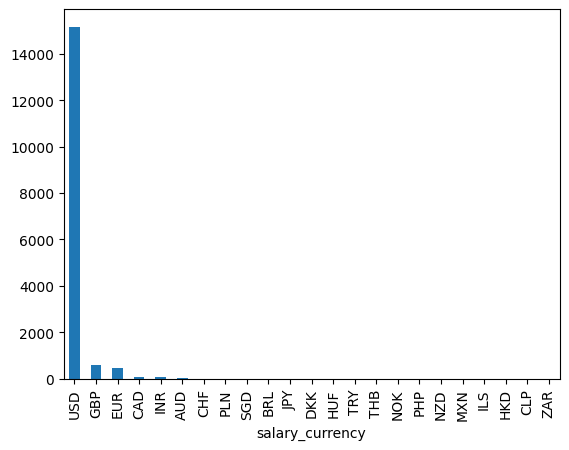

In [ ]:
df_clean.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Employee residence

In [ ]:
df_clean.employee_residence.unique()

array(['US', 'ES', 'IN', 'DE', 'HR', 'BE', 'FR', 'UA', 'IT', 'FI', 'CA',
       'SE', 'BA', 'IL', 'GB', 'AE', 'OM', 'CZ', 'PT', 'RO', 'QA', 'KR',
       'PK', 'TN', 'SA', 'TR', 'AU', 'GH', 'CO', 'DK', 'EG', 'LT', 'HU',
       'NL', 'NG', 'BR', 'AR', 'KE', 'AT', 'BO', 'VN', 'PL', 'AS', 'MU',
       'PH', 'MX', 'MD', 'AM', 'LU', 'ZA', 'LV', 'SG', 'RU', 'GE', 'GR',
       'IE', 'SI', 'EE', 'CF', 'UZ', 'KW', 'CN', 'CR', 'ID', 'BG', 'NZ',
       'MT', 'CH', 'PE', 'PR', 'JP', 'HK', 'LB', 'TH', 'AD', 'EC', 'NO',
       'CY', 'DO', 'DZ', 'RS', 'CL', 'MY', 'IQ', 'UG', 'IR', 'HN', 'JE'],
      dtype=object)

In [ ]:
df_clean.employee_residence.unique().size

88

In [ ]:
employee_residence = pd.DataFrame(df_clean.employee_residence.value_counts().copy())

In [ ]:
top_employee_residence = employee_residence.head(20)

In [ ]:
top_employee_residence

,count
employee_residence,
US,14338
GB,680
CA,452
ES,137
DE,98
IN,78
FR,69
AU,54
NL,32


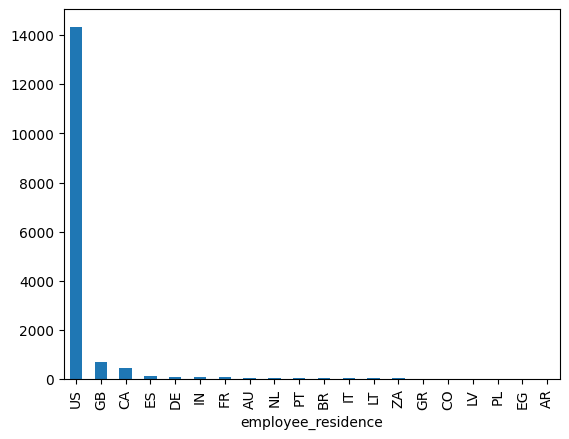

In [ ]:
top_employee_residence.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Remote ratio

In [ ]:
df_clean.remote_ratio.unique()

array([  0, 100,  50])

In [ ]:
df_clean.remote_ratio.value_counts()

remote_ratio
0      11006
100     5144
50       246
Name: count, dtype: int64

In [ ]:
df_clean.remote_ratio.value_counts()/16396*100

remote_ratio
0      67.126128
100    31.373506
50      1.500366
Name: count, dtype: float64

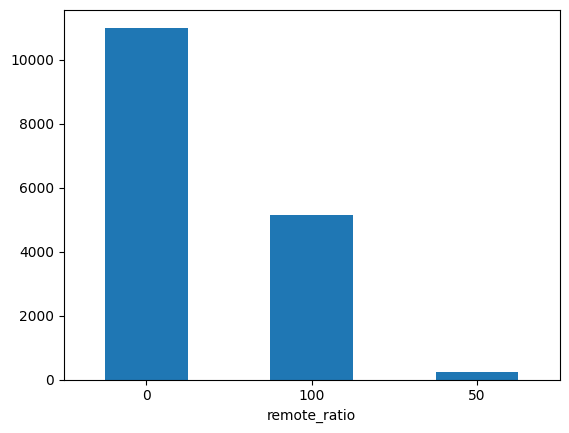

In [ ]:
df_clean.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Company location

In [ ]:
df_clean.company_location.unique()

array(['US', 'ES', 'IN', 'DE', 'FR', 'UA', 'IT', 'FI', 'CA', 'SE', 'BA',
       'IL', 'GB', 'AE', 'OM', 'PT', 'RO', 'QA', 'KR', 'AU', 'HU', 'CH',
       'SA', 'TR', 'GH', 'CO', 'DK', 'AS', 'EG', 'LT', 'NL', 'NG', 'BR',
       'KE', 'PK', 'AT', 'CZ', 'PL', 'BS', 'MU', 'PH', 'JP', 'MX', 'MD',
       'GI', 'RU', 'LU', 'ZA', 'LV', 'SG', 'IE', 'SI', 'EE', 'CF', 'HR',
       'AR', 'ID', 'GR', 'NZ', 'MT', 'PR', 'LB', 'TH', 'AD', 'EC', 'NO',
       'HK', 'BE', 'MY', 'DZ', 'CL', 'IQ', 'VN', 'AM', 'IR', 'HN', 'CN'],
      dtype=object)

In [ ]:
df_clean.company_location.unique().size

77

In [ ]:
company_location = pd.DataFrame(df_clean.company_location.value_counts().copy())

In [ ]:
top_company_location = company_location.head(20)

In [ ]:
top_company_location

,count
company_location,
US,14389
GB,688
CA,454
ES,133
DE,105
FR,65
IN,63
AU,57
NL,32


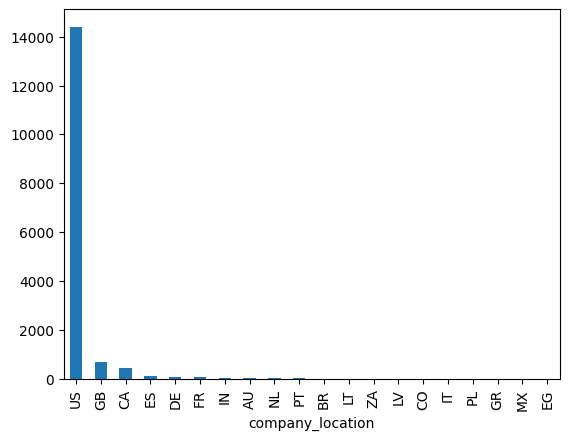

In [ ]:
top_company_location.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Company size

In [ ]:
df_clean.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
df_clean.company_size.value_counts()

company_size
M    15177
L     1032
S      187
Name: count, dtype: int64

In [ ]:
df_clean.company_size.value_counts()/16396*100

company_size
M    92.565260
L     6.294218
S     1.140522
Name: count, dtype: float64

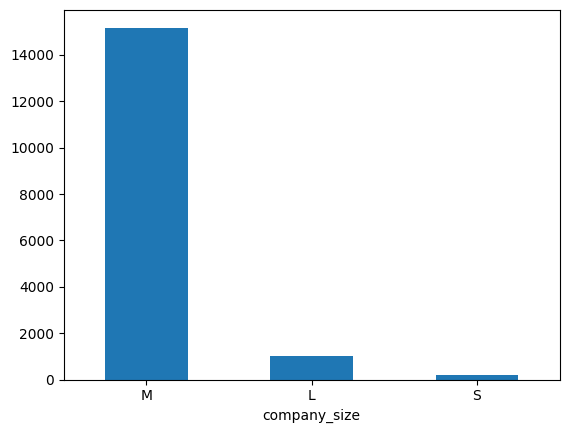

In [ ]:
df_clean.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

# Hypothesis testing

## Work year

In [ ]:
df_hypo = df_clean.copy()[['work_year', 'salary_in_usd']]

In [ ]:
df_hypo.head()

,work_year,salary_in_usd
0,2024,95000
1,2024,42222
2,2022,60000
3,2023,50000
4,2022,180000


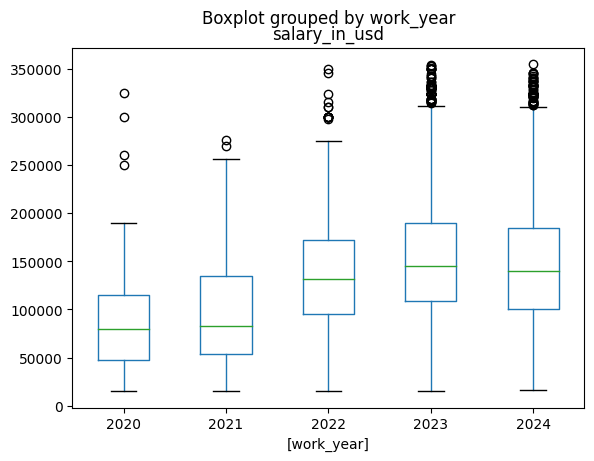

In [ ]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

In [ ]:
salary_2020 = np.array(df_hypo[df_hypo.work_year == 2020].copy()[['salary_in_usd']])
salary_2021 = np.array(df_hypo[df_hypo.work_year == 2021].copy()[['salary_in_usd']])
salary_2022 = np.array(df_hypo[df_hypo.work_year == 2022].copy()[['salary_in_usd']])
salary_2023 = np.array(df_hypo[df_hypo.work_year == 2023].copy()[['salary_in_usd']])
salary_2024 = np.array(df_hypo[df_hypo.work_year == 2024].copy()[['salary_in_usd']])

In [ ]:
salary_2020.size

73

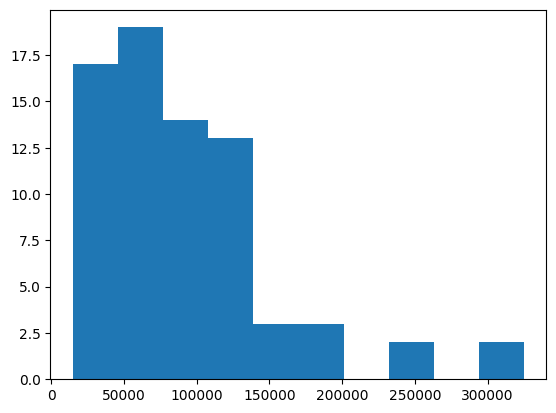

In [ ]:
plt.hist(salary_2020)
plt.show()

In [ ]:
salary_2021.size

216

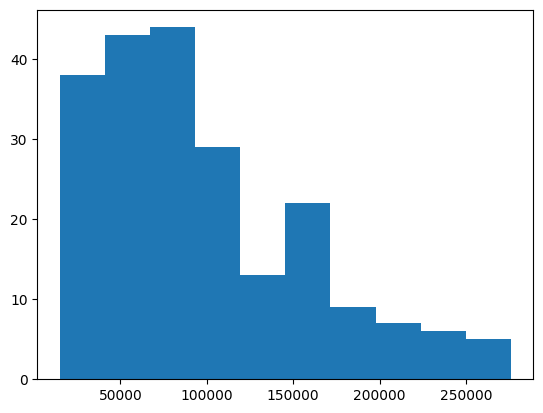

In [ ]:
plt.hist(salary_2021)
plt.show()

In [ ]:
salary_2022.size

1650

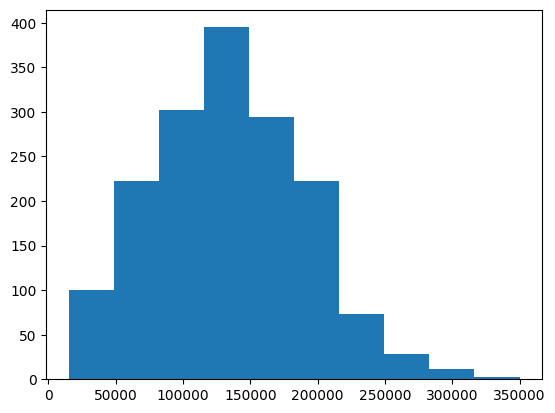

In [ ]:
plt.hist(salary_2022)
plt.show()

In [ ]:
salary_2023.size

8467

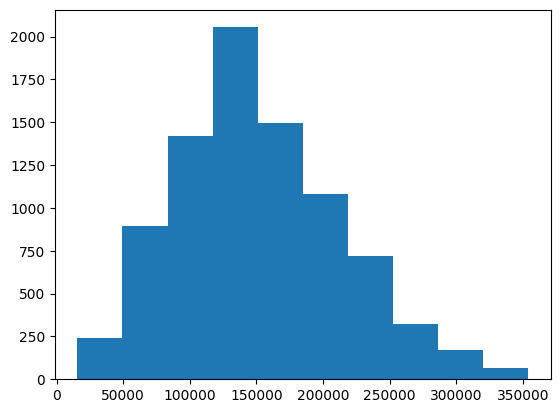

In [ ]:
plt.hist(salary_2023)
plt.show()

In [ ]:
salary_2024.size

5990

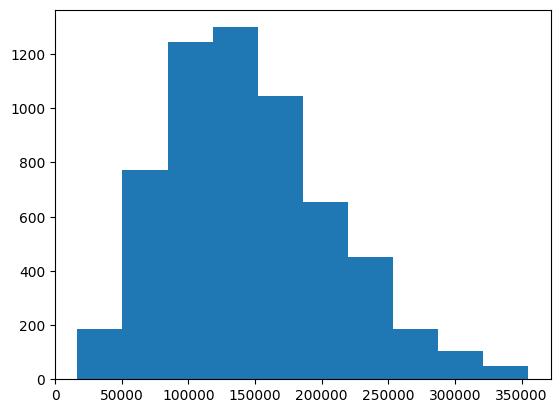

In [ ]:
plt.hist(salary_2024)
plt.show()

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.work_year))

In [ ]:
X_resampled

array([[ 95000],
       [ 42222],
       [ 60000],
       ...,
       [ 78800],
       [ 62500],
       [151500]])

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled

array([ 95000,  42222,  60000, ...,  78800,  62500, 151500])

In [ ]:
X_resampled.size

42335

In [ ]:
y_resampled

array([2024, 2024, 2022, ..., 2024, 2024, 2024])

In [ ]:
y_resampled.size

42335

In [ ]:
df_hypo = pd.DataFrame({'work_year': y_resampled, 'salary_in_usd': X_resampled})

In [ ]:
df_hypo.head()

,work_year,salary_in_usd
0,2024,95000
1,2024,42222
2,2022,60000
3,2023,50000
4,2022,180000


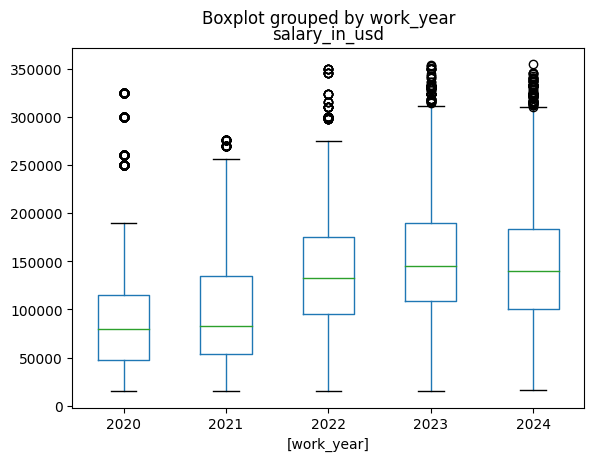

In [ ]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

In [ ]:
salary_2020 = np.array(df_hypo[df_hypo.work_year == 2020].copy()[['salary_in_usd']])
salary_2021 = np.array(df_hypo[df_hypo.work_year == 2021].copy()[['salary_in_usd']])
salary_2022 = np.array(df_hypo[df_hypo.work_year == 2022].copy()[['salary_in_usd']])
salary_2023 = np.array(df_hypo[df_hypo.work_year == 2023].copy()[['salary_in_usd']])
salary_2024 = np.array(df_hypo[df_hypo.work_year == 2024].copy()[['salary_in_usd']])

In [ ]:
salary_2020.size

8467

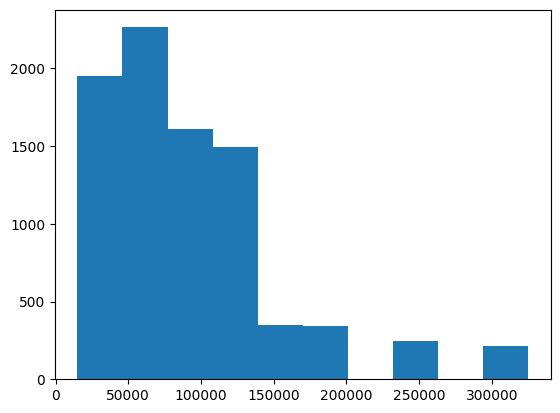

In [ ]:
plt.hist(salary_2020)
plt.show()

In [ ]:
salary_2021.size

8467

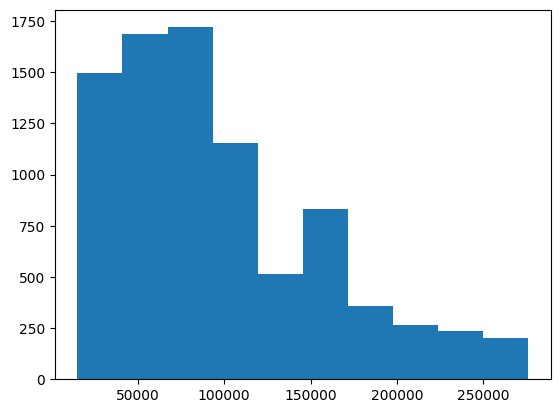

In [ ]:
plt.hist(salary_2021)
plt.show()

In [ ]:
salary_2022.size

8467

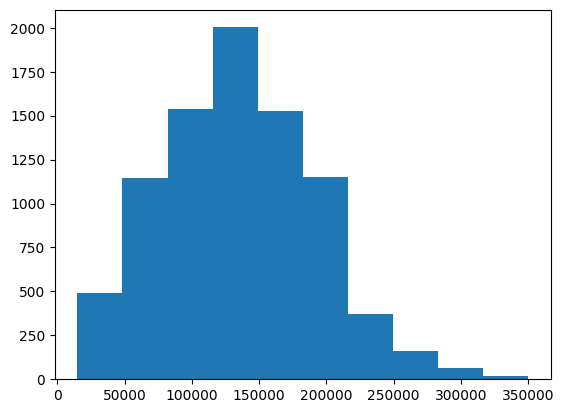

In [ ]:
plt.hist(salary_2022)
plt.show()

In [ ]:
salary_2023.size

8467

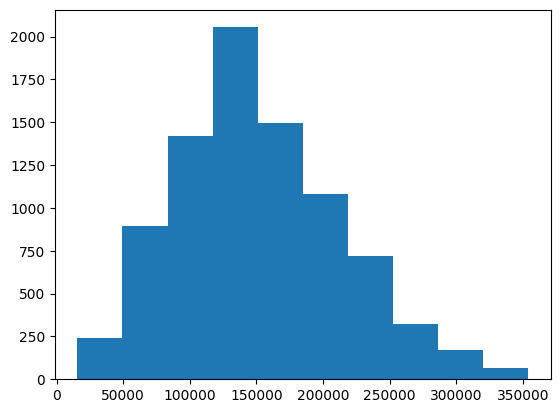

In [ ]:
plt.hist(salary_2023)
plt.show()

In [ ]:
salary_2024.size

8467

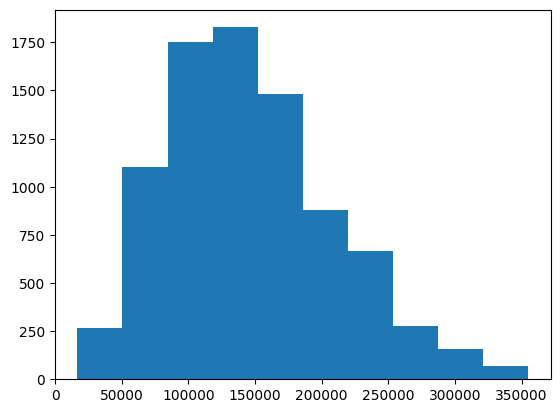

In [ ]:
plt.hist(salary_2024)
plt.show()

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2021 data engineers have salary no higher than 2020 data engineers."
alternate_hypothesis = "2021 data engineers have salary higher than 2020 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2021, salary_2020)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2021 is lower than 2020 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2021 is higher than 2020 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2021 and 2020 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [3.97695881]
P-value: [7.03834301e-05]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2021 is higher than 2020 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2022 data engineers have salary no higher than 2021 data engineers."
alternate_hypothesis = "2022 data engineers have salary higher than 2021 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2022, salary_2021)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2022 is lower than 2021 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2022 is higher than 2021 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2022 and 2021 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [42.56052227]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2022 is higher than 2021 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2023 data engineers have salary no higher than 2022 data engineers."
alternate_hypothesis = "2023 data engineers have salary higher than 2022 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2023, salary_2022)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2023 is lower than 2022 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2023 is higher than 2022 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2023 and 2022 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [19.25789109]
P-value: [6.41070818e-81]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2023 is higher than 2022 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2024 data engineers have salary no higher than 2023 data engineers."
alternate_hypothesis = "2024 data engineers have salary higher than 2023 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2024, salary_2023)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is lower than 2023 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is higher than 2023 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2024 and 2023 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-6.02876892]
P-value: [1.72130686e-09]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2024 is lower than 2023 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2024 data engineers have salary no higher than 2022 data engineers."
alternate_hypothesis = "2024 data engineers have salary higher than 2022 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2024, salary_2022)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is lower than 2022 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is higher than 2022 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2024 and 2022 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [13.14860956]
P-value: [4.18254927e-39]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2024 is higher than 2022 data engineers.


## Experience level

In [ ]:
df_hypo = df_clean.copy()[['experience_level', 'salary_in_usd']]

In [ ]:
df_hypo.head()

,experience_level,salary_in_usd
0,MI,95000
1,MI,42222
2,SE,60000
3,EN,50000
4,SE,180000


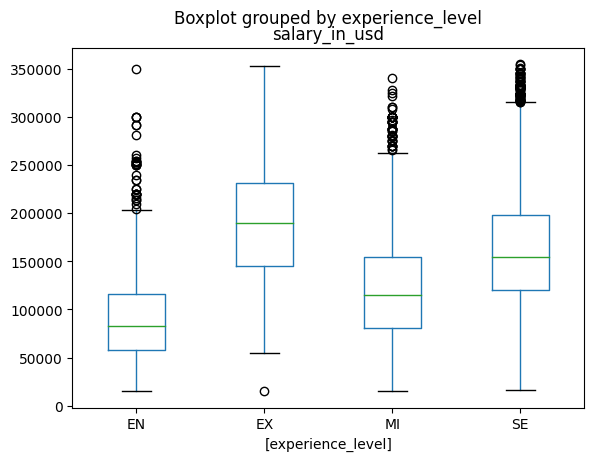

In [ ]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

In [ ]:
salary_EN = np.array(df_hypo[df_hypo.experience_level == 'EN'].copy()[['salary_in_usd']])
salary_MI = np.array(df_hypo[df_hypo.experience_level == 'MI'].copy()[['salary_in_usd']])
salary_SE = np.array(df_hypo[df_hypo.experience_level == 'SE'].copy()[['salary_in_usd']])
salary_EX = np.array(df_hypo[df_hypo.experience_level == 'EX'].copy()[['salary_in_usd']])

In [ ]:
salary_EN.size

1324

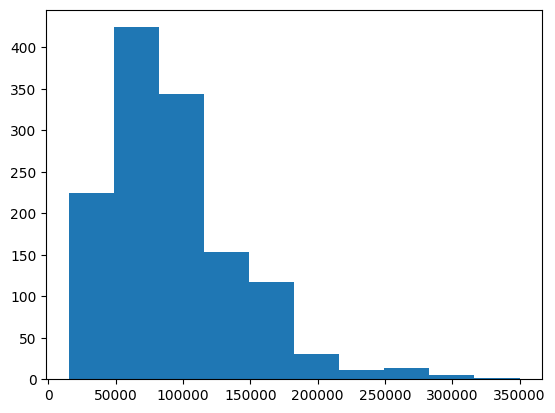

In [ ]:
plt.hist(salary_EN)
plt.show()

In [ ]:
salary_MI.size

4002

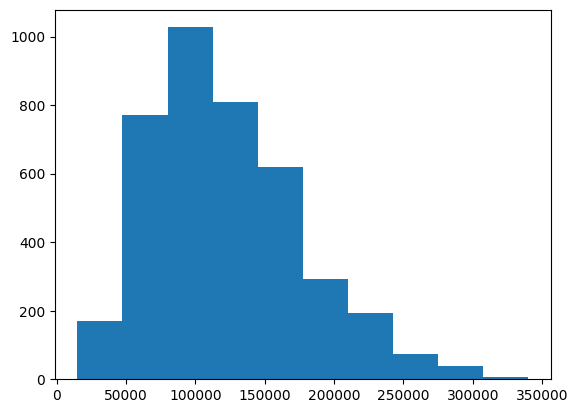

In [ ]:
plt.hist(salary_MI)
plt.show()

In [ ]:
salary_SE.size

10579

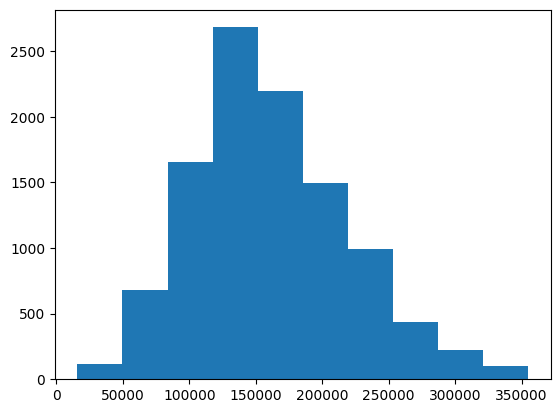

In [ ]:
plt.hist(salary_SE)
plt.show()

In [ ]:
salary_EX.size

491

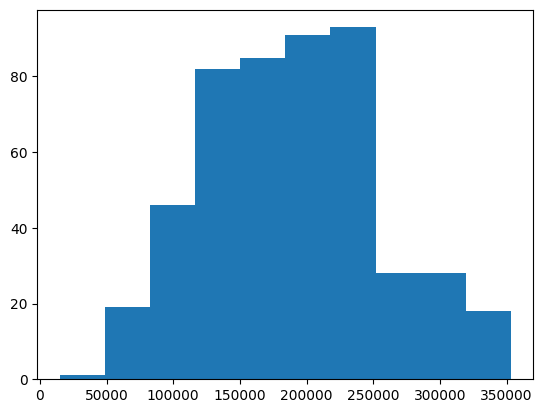

In [ ]:
plt.hist(salary_EX)
plt.show()

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.experience_level))

In [ ]:
X_resampled

array([[ 95000],
       [ 42222],
       [ 60000],
       ...,
       [140000],
       [ 55410],
       [105000]])

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled

array([ 95000,  42222,  60000, ..., 140000,  55410, 105000])

In [ ]:
X_resampled.size

42316

In [ ]:
y_resampled

array(['MI', 'MI', 'SE', ..., 'MI', 'MI', 'MI'], dtype=object)

In [ ]:
y_resampled.size

42316

In [ ]:
df_hypo = pd.DataFrame({'experience_level': y_resampled, 'salary_in_usd': X_resampled})

In [ ]:
df_hypo.head()

,experience_level,salary_in_usd
0,MI,95000
1,MI,42222
2,SE,60000
3,EN,50000
4,SE,180000


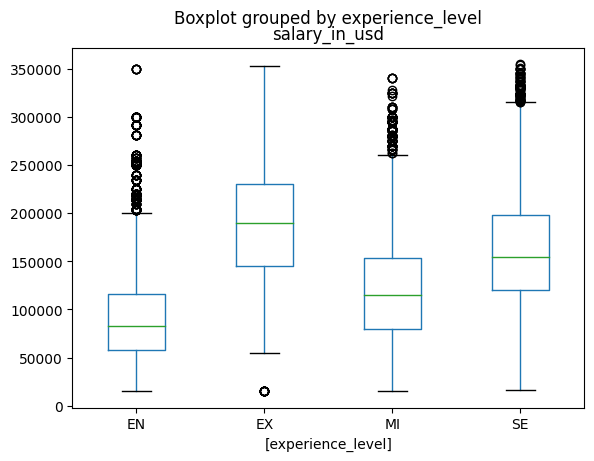

In [ ]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

In [ ]:
salary_EN = np.array(df_hypo[df_hypo.experience_level == 'EN'].copy()[['salary_in_usd']])
salary_MI = np.array(df_hypo[df_hypo.experience_level == 'MI'].copy()[['salary_in_usd']])
salary_SE = np.array(df_hypo[df_hypo.experience_level == 'SE'].copy()[['salary_in_usd']])
salary_EX = np.array(df_hypo[df_hypo.experience_level == 'EX'].copy()[['salary_in_usd']])

In [ ]:
salary_EN.size

10579

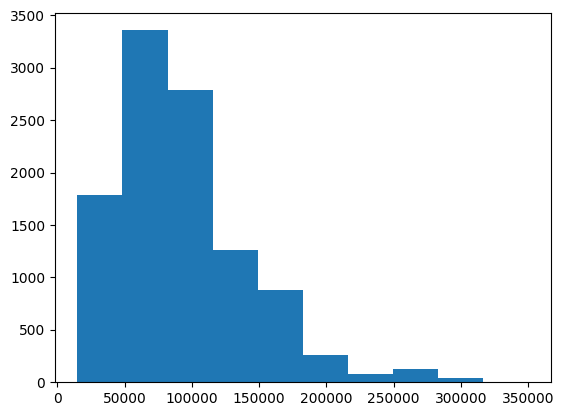

In [ ]:
plt.hist(salary_EN)
plt.show()

In [ ]:
salary_MI.size

10579

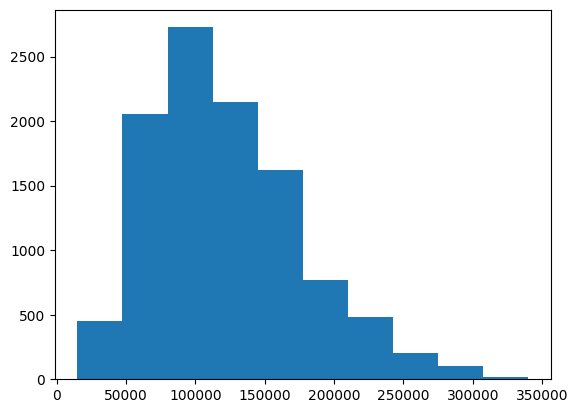

In [ ]:
plt.hist(salary_MI)
plt.show()

In [ ]:
salary_SE.size

10579

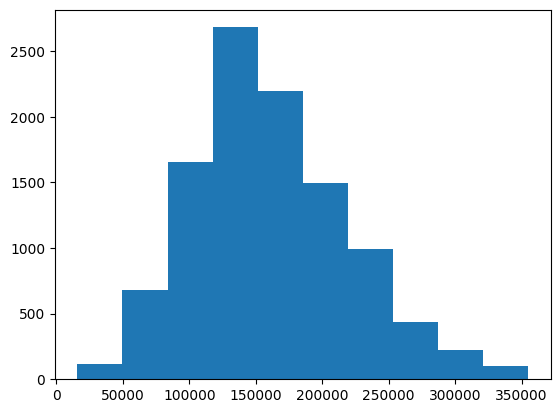

In [ ]:
plt.hist(salary_SE)
plt.show()

In [ ]:
salary_EX.size

10579

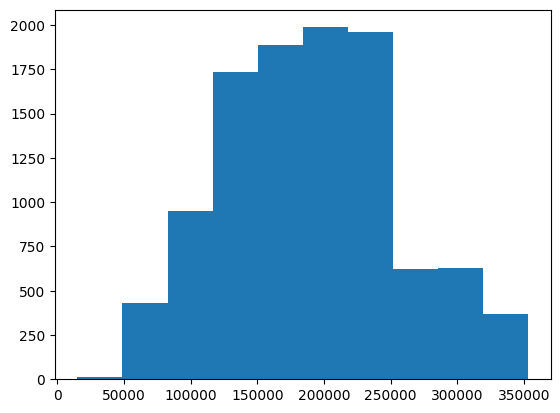

In [ ]:
plt.hist(salary_EX)
plt.show()

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Middle level data engineers have salary no higher than entry level data engineers."
alternate_hypothesis = "Middle level data engineers have salary higher than entry level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_MI, salary_EN)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for middle level is lower than entry level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for middle level is higher than entry level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for middle level and entry level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [43.27257142]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for middle level is higher than entry level data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Senior level data engineers have salary no higher than middle level data engineers."
alternate_hypothesis = "Senior level data engineers have salary higher than middle level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_SE, salary_MI)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for senior level is lower than middle level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for senior level is higher than middle level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for senior level and middle level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [51.54587752]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for senior level is higher than middle level data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Expert level data engineers have salary no higher than senior level data engineers."
alternate_hypothesis = "Expert level data engineers have salary higher than senior level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_EX, salary_SE)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for expert level is lower than senior level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for expert level is higher than senior level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for expert level and senior level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [35.57231813]
P-value: [6.77272405e-262]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for expert level is higher than senior level data engineers.


## Employment type

In [ ]:
df_hypo = df_clean.copy()[['employment_type', 'salary_in_usd']]

In [ ]:
df_hypo.head()

,employment_type,salary_in_usd
0,FT,95000
1,FT,42222
2,FT,60000
3,FT,50000
4,FT,180000


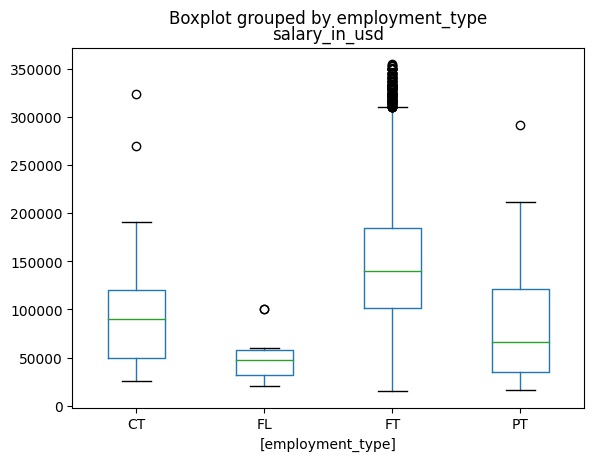

In [ ]:
df_hypo.boxplot(by='employment_type', grid = False)
plt.show()

In [ ]:
salary_FT = np.array(df_hypo[df_hypo.employment_type == 'FT'].copy()[['salary_in_usd']])
salary_CT = np.array(df_hypo[df_hypo.employment_type == 'CT'].copy()[['salary_in_usd']])
salary_PT = np.array(df_hypo[df_hypo.employment_type == 'PT'].copy()[['salary_in_usd']])
salary_FL = np.array(df_hypo[df_hypo.employment_type == 'FL'].copy()[['salary_in_usd']])

In [ ]:
salary_FT.size

16317

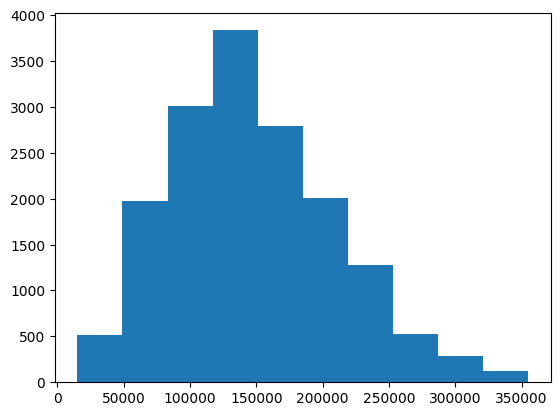

In [ ]:
plt.hist(salary_FT)
plt.show()

In [ ]:
salary_CT.size

27

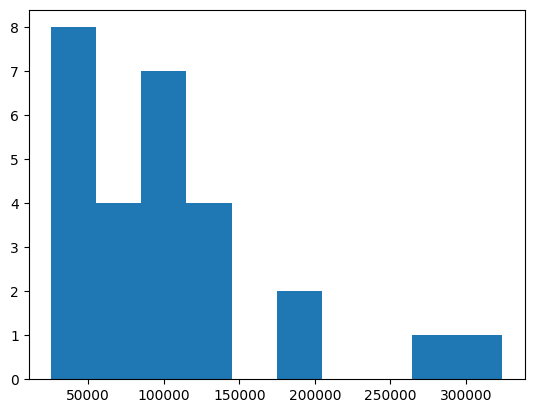

In [ ]:
plt.hist(salary_CT)
plt.show()

In [ ]:
salary_PT.size

38

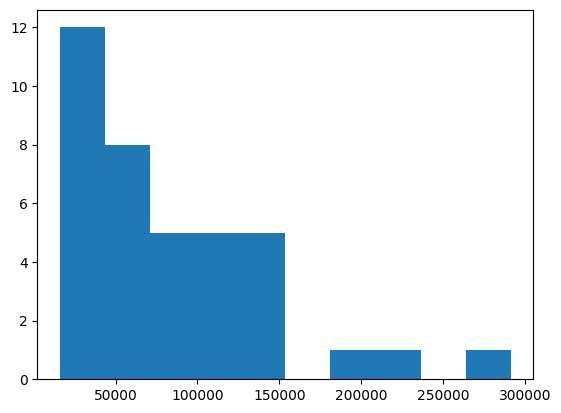

In [ ]:
plt.hist(salary_PT)
plt.show()

In [ ]:
salary_FL.size

14

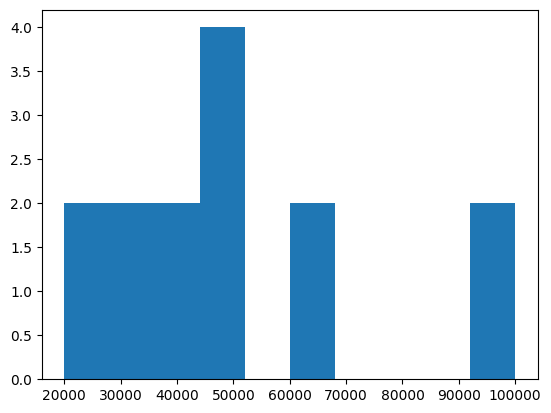

In [ ]:
plt.hist(salary_FL)
plt.show()

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.employment_type))

In [ ]:
X_resampled

array([[ 95000],
       [ 42222],
       [ 60000],
       ...,
       [110000],
       [110000],
       [133000]])

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled

array([ 95000,  42222,  60000, ..., 110000, 110000, 133000])

In [ ]:
X_resampled.size

65268

In [ ]:
y_resampled

array(['FT', 'FT', 'FT', ..., 'PT', 'PT', 'PT'], dtype=object)

In [ ]:
y_resampled.size

65268

In [ ]:
df_hypo = pd.DataFrame({'employment_type': y_resampled, 'salary_in_usd': X_resampled})

In [ ]:
df_hypo.head()

,employment_type,salary_in_usd
0,FT,95000
1,FT,42222
2,FT,60000
3,FT,50000
4,FT,180000


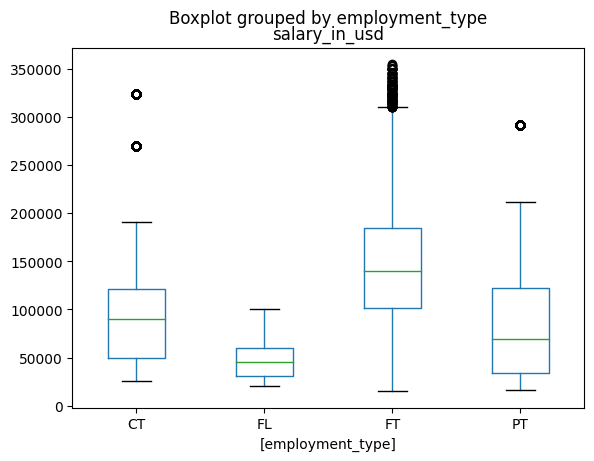

In [ ]:
df_hypo.boxplot(by='employment_type', grid = False)
plt.show()

In [ ]:
salary_FT = np.array(df_hypo[df_hypo.employment_type == 'FT'].copy()[['salary_in_usd']])
salary_CT = np.array(df_hypo[df_hypo.employment_type == 'CT'].copy()[['salary_in_usd']])
salary_PT = np.array(df_hypo[df_hypo.employment_type == 'PT'].copy()[['salary_in_usd']])
salary_FL = np.array(df_hypo[df_hypo.employment_type == 'FL'].copy()[['salary_in_usd']])

In [ ]:
salary_FT.size

16317

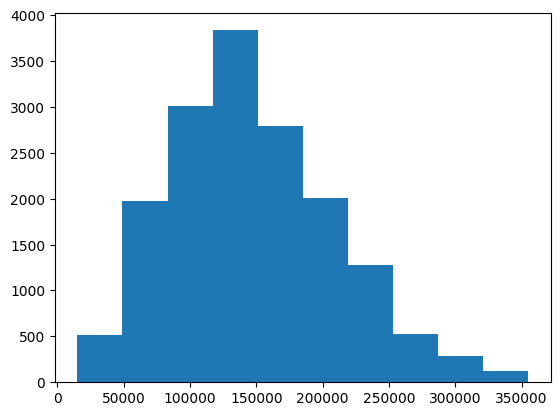

In [ ]:
plt.hist(salary_FT)
plt.show()

In [ ]:
salary_CT.size

16317

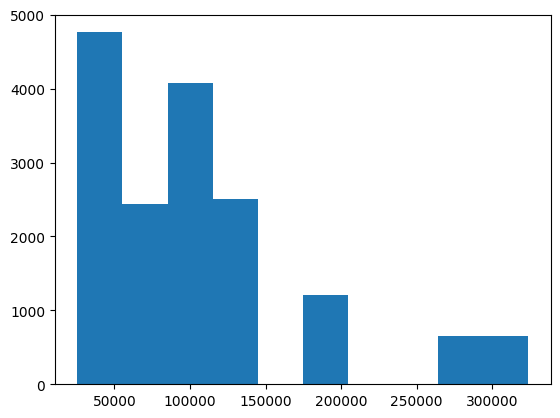

In [ ]:
plt.hist(salary_CT)
plt.show()

In [ ]:
salary_PT.size

16317

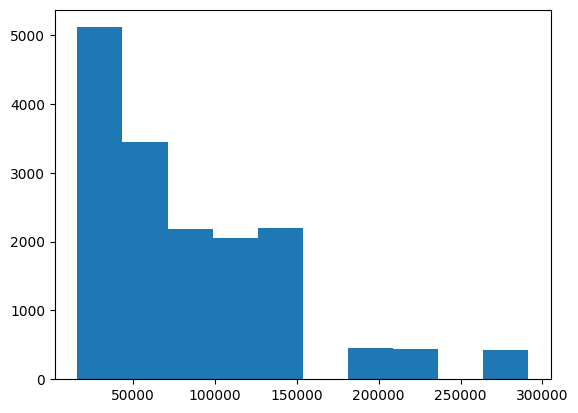

In [ ]:
plt.hist(salary_PT)
plt.show()

In [ ]:
salary_FL.size

16317

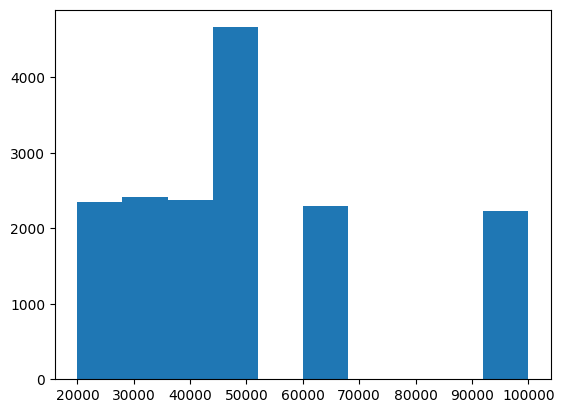

In [ ]:
plt.hist(salary_FL)
plt.show()

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Fulltime data engineers have salary no higher than contract data engineers."
alternate_hypothesis = "Fulltime data engineers have salary higher than contract data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_FT, salary_CT)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for fulltime is lower than contract data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for fulltime is higher than contract data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for fulltime and contract data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [60.44861055]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for fulltime is higher than contract data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Contract data engineers have salary no higher than parttime data engineers."
alternate_hypothesis = "Contract data engineers have salary higher than parttime data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_CT, salary_PT)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for contract is lower than parttime data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for contract is higher than parttime data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for contract and parttime data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [25.58738387]
P-value: [1.29047087e-141]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for contract is higher than parttime data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Parttime data engineers have salary no higher than freelance data engineers."
alternate_hypothesis = "Parttime data engineers have salary higher than freelance data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_PT, salary_FL)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for parttime is lower than freelance data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for parttime is higher than freelance data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for parttime and freelance data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [68.45973012]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for parttime is higher than freelance data engineers.


## Remote ratio

In [ ]:
df_hypo = df_clean.copy()[['remote_ratio', 'salary_in_usd']]

In [ ]:
df_hypo.head()

,remote_ratio,salary_in_usd
0,0,95000
1,100,42222
2,100,60000
3,0,50000
4,100,180000


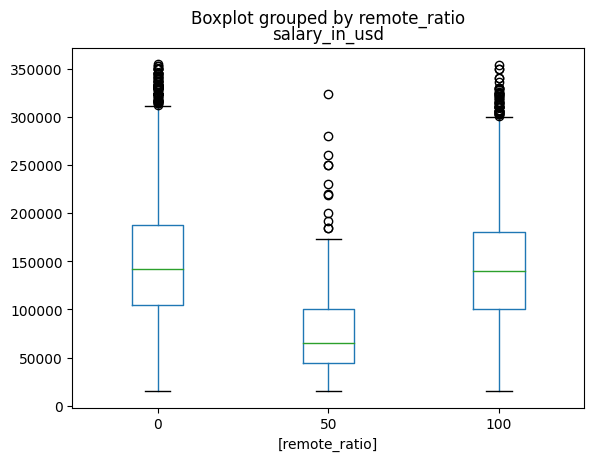

In [ ]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

In [ ]:
salary_0 = np.array(df_hypo[df_hypo.remote_ratio == 0].copy()[['salary_in_usd']])
salary_50 = np.array(df_hypo[df_hypo.remote_ratio == 50].copy()[['salary_in_usd']])
salary_100 = np.array(df_hypo[df_hypo.remote_ratio == 100].copy()[['salary_in_usd']])

In [ ]:
salary_0.size

11006

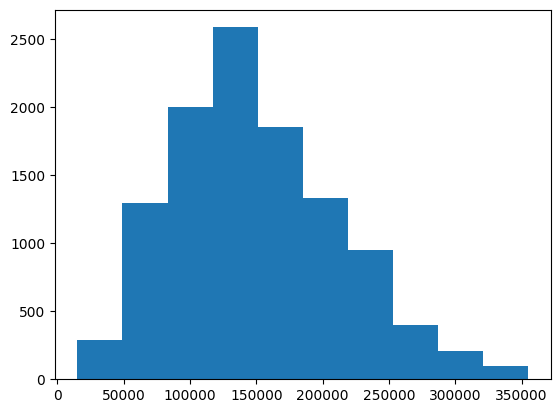

In [ ]:
plt.hist(salary_0)
plt.show()

In [ ]:
salary_50.size

246

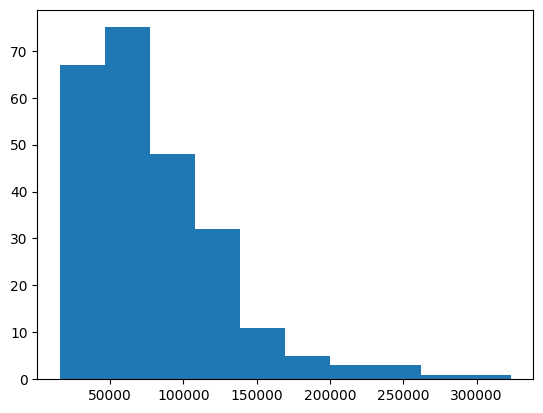

In [ ]:
plt.hist(salary_50)
plt.show()

In [ ]:
salary_100.size

5144

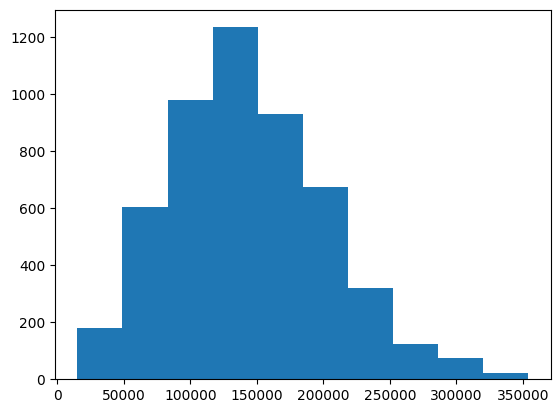

In [ ]:
plt.hist(salary_100)
plt.show()

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.remote_ratio))

In [ ]:
X_resampled

array([[ 95000],
       [ 42222],
       [ 60000],
       ...,
       [ 67672],
       [ 50000],
       [286000]])

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled

array([ 95000,  42222,  60000, ...,  67672,  50000, 286000])

In [ ]:
X_resampled.size

33018

In [ ]:
y_resampled

array([  0, 100, 100, ..., 100, 100, 100])

In [ ]:
y_resampled.size

33018

In [ ]:
df_hypo = pd.DataFrame({'remote_ratio': y_resampled, 'salary_in_usd': X_resampled})

In [ ]:
df_hypo.head()

,remote_ratio,salary_in_usd
0,0,95000
1,100,42222
2,100,60000
3,0,50000
4,100,180000


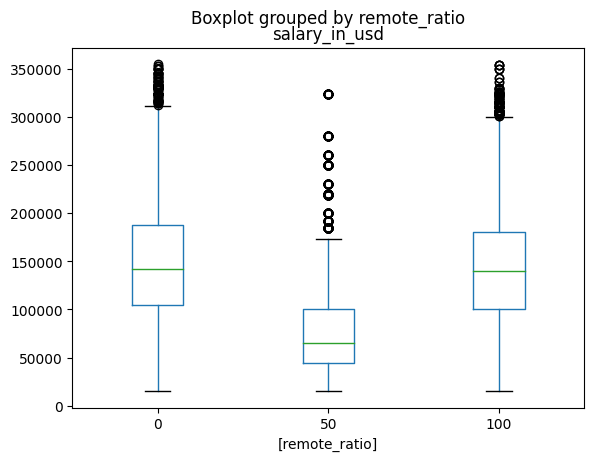

In [ ]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

In [ ]:
salary_0 = np.array(df_hypo[df_hypo.remote_ratio == 0].copy()[['salary_in_usd']])
salary_50 = np.array(df_hypo[df_hypo.remote_ratio == 50].copy()[['salary_in_usd']])
salary_100 = np.array(df_hypo[df_hypo.remote_ratio == 100].copy()[['salary_in_usd']])

In [ ]:
salary_0.size

11006

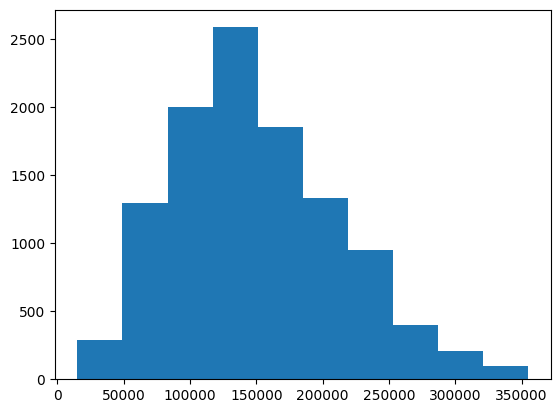

In [ ]:
plt.hist(salary_0)
plt.show()

In [ ]:
salary_50.size

11006

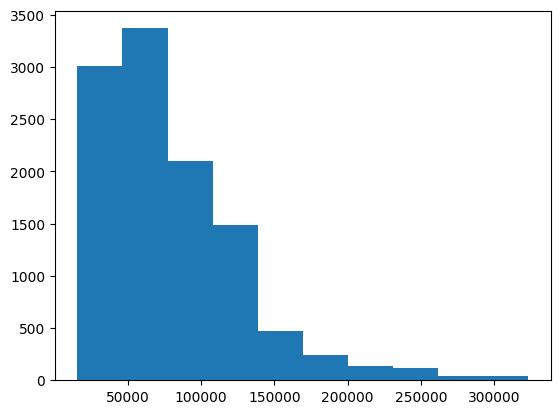

In [ ]:
plt.hist(salary_50)
plt.show()

In [ ]:
salary_100.size

11006

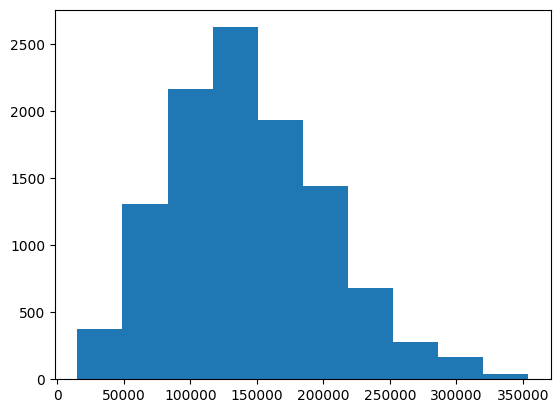

In [ ]:
plt.hist(salary_100)
plt.show()

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "On-site data engineers have salary no higher than hybrid data engineers."
alternate_hypothesis = "On-site data engineers have salary higher than hybrid data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_0, salary_50)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for onsite is lower than hybrid data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for onsite is higher than hybrid data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for on-site and hybrid data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [93.5730043]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for onsite is higher than hybrid data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Remote data engineers have salary no higher than hybrid data engineers."
alternate_hypothesis = "Remote data engineers have salary higher than hybrid data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_100, salary_50)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for remote is lower than hybrid data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for remote is higher than hybrid data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for remote and hybrid data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [88.81041832]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for remote is higher than hybrid data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Onsite data engineers have salary no higher than remote data engineers."
alternate_hypothesis = "Onsite data engineers have salary higher than remote data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_100, salary_0)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for remote is lower than onsite data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for remote is higher than onsite data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for remote and onsite data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-7.56365493]
P-value: [4.23125211e-14]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for remote is lower than onsite data engineers.


## Company size

In [ ]:
df_hypo = df_clean.copy()[['company_size', 'salary_in_usd']]

In [ ]:
df_hypo.head()

,company_size,salary_in_usd
0,M,95000
1,L,42222
2,M,60000
3,M,50000
4,M,180000


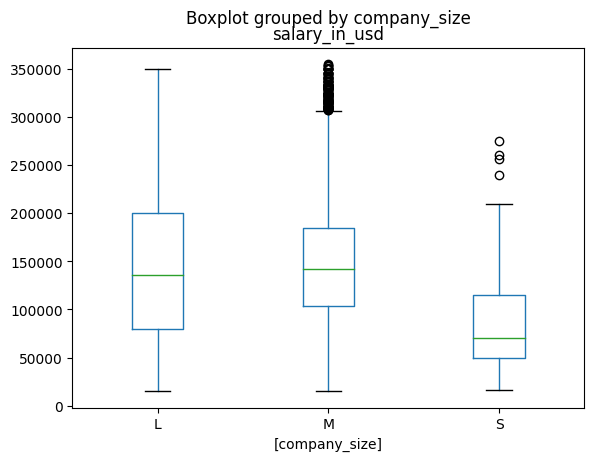

In [ ]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

In [ ]:
salary_S = np.array(df_hypo[df_hypo.company_size == 'S'].copy()[['salary_in_usd']])
salary_M = np.array(df_hypo[df_hypo.company_size == 'M'].copy()[['salary_in_usd']])
salary_L = np.array(df_hypo[df_hypo.company_size == 'L'].copy()[['salary_in_usd']])

In [ ]:
salary_S.size

187

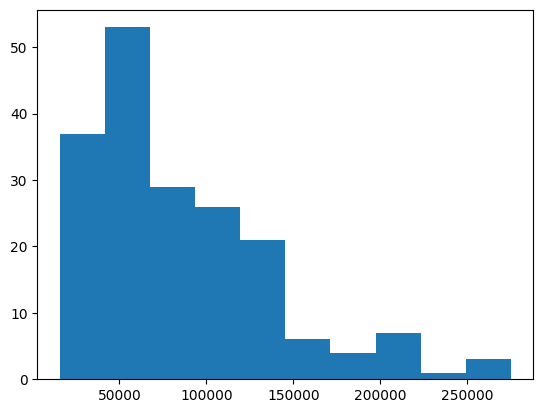

In [ ]:
plt.hist(salary_S)
plt.show()

In [ ]:
salary_M.size

15177

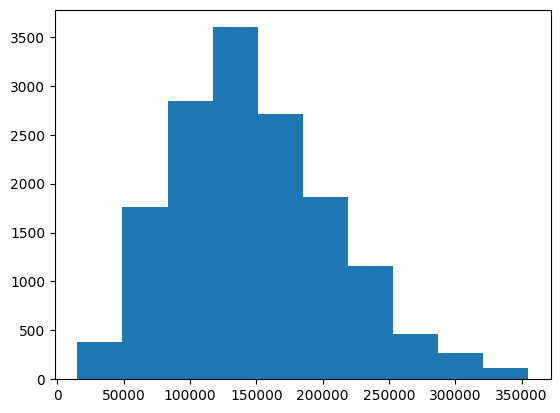

In [ ]:
plt.hist(salary_M)
plt.show()

In [ ]:
salary_L.size

1032

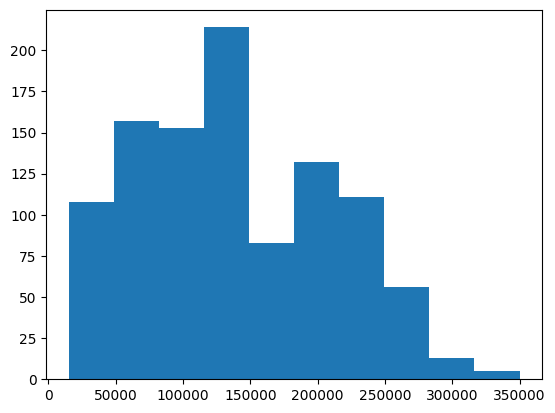

In [ ]:
plt.hist(salary_L)
plt.show()

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.company_size))

In [ ]:
X_resampled

array([[ 95000],
       [ 42222],
       [ 60000],
       ...,
       [ 55000],
       [100000],
       [ 60207]])

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled

array([ 95000,  42222,  60000, ...,  55000, 100000,  60207])

In [ ]:
X_resampled.size

45531

In [ ]:
y_resampled

array(['M', 'L', 'M', ..., 'S', 'S', 'S'], dtype=object)

In [ ]:
y_resampled.size

45531

In [ ]:
df_hypo = pd.DataFrame({'company_size': y_resampled, 'salary_in_usd': X_resampled})

In [ ]:
df_hypo.head()

,company_size,salary_in_usd
0,M,95000
1,L,42222
2,M,60000
3,M,50000
4,M,180000


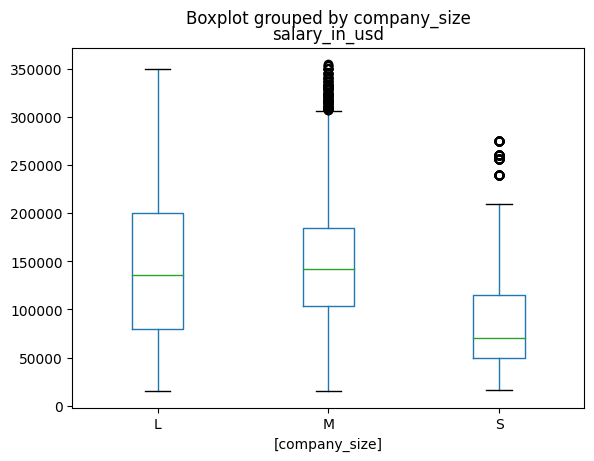

In [ ]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

In [ ]:
salary_S = np.array(df_hypo[df_hypo.company_size == 'S'].copy()[['salary_in_usd']])
salary_M = np.array(df_hypo[df_hypo.company_size == 'M'].copy()[['salary_in_usd']])
salary_L = np.array(df_hypo[df_hypo.company_size == 'L'].copy()[['salary_in_usd']])

In [ ]:
salary_S.size

15177

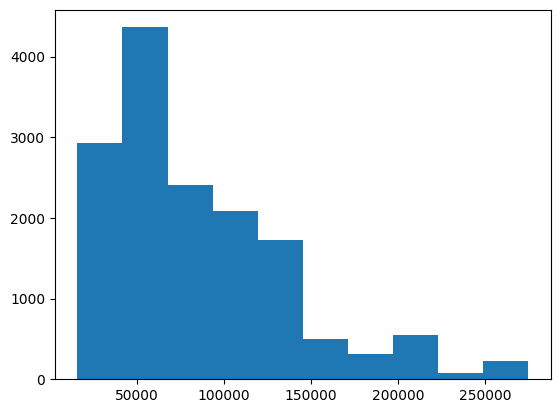

In [ ]:
plt.hist(salary_S)
plt.show()

In [ ]:
salary_M.size

15177

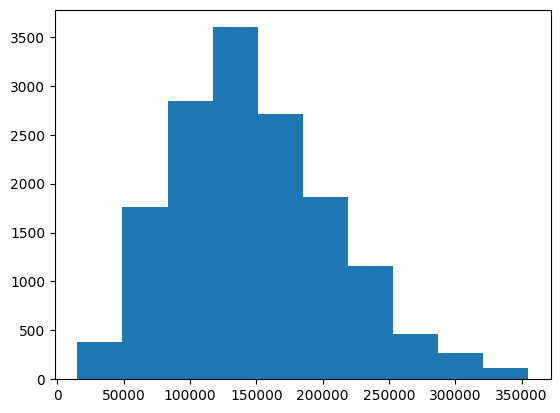

In [ ]:
plt.hist(salary_M)
plt.show()

In [ ]:
salary_L.size

15177

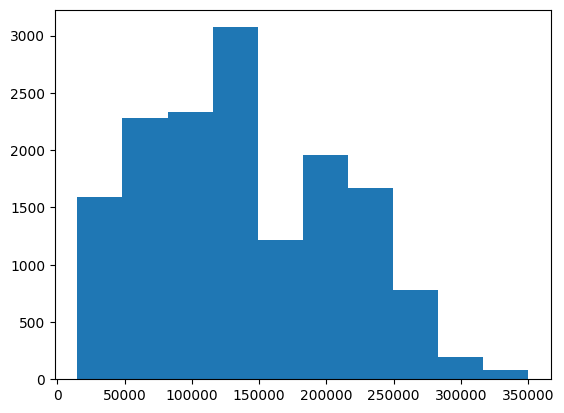

In [ ]:
plt.hist(salary_L)
plt.show()

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Middle-sized company data engineers have salary no higher than small-sized company data engineers."
alternate_hypothesis = "Middle-sized company data engineers have salary higher than small-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_M, salary_S)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for middle-sized company is lower than small-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for middle-sized company is higher than small-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for middle and small-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [98.73539227]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for middle-sized company is higher than small-sized company data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Large-sized company data engineers have salary no higher than middle-sized company data engineers."
alternate_hypothesis = "Large-sized company data engineers have salary higher than middle-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_L, salary_M)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is lower than middle-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is higher than middle-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for large and middle-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-12.95320364]
P-value: [3.59064919e-38]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for large-sized company is lower than middle-sized company data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Large-sized company data engineers have salary no higher than small-sized company data engineers."
alternate_hypothesis = "Large-sized company data engineers have salary higher than small-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_L, salary_S)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is lower than small-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is higher than small-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for large and small-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [75.90676041]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for large-sized company is higher than small-sized company data engineers.


# Recode variables

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,US,M
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,ES,L
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,IN,M
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,DE,M
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,US,M


##Work year

In [ ]:
work_year_dummy = pd.get_dummies(df_clean.work_year)

In [ ]:
work_year_dummy.head()

,2020,2021,2022,2023,2024
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,True,False,False


In [ ]:
work_year_dummy = work_year_dummy.set_axis(['work_year_2020', 'work_year_2021', 'work_year_2022', 'work_year_2023', 'work_year_2024'], axis=1)

In [ ]:
work_year_dummy.head()

,work_year_2020,work_year_2021,work_year_2022,work_year_2023,work_year_2024
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,True,False,False


In [ ]:
df_clean = pd.concat([df_clean, work_year_dummy], axis=1)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_year_2020,work_year_2021,work_year_2022,work_year_2023,work_year_2024
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,US,M,False,False,False,False,True
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,ES,L,False,False,False,False,True
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,IN,M,False,False,True,False,False
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,DE,M,False,False,False,True,False
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,US,M,False,False,True,False,False


##Experience level

In [ ]:
experience_level_dummy = pd.get_dummies(df_clean.experience_level)

In [ ]:
experience_level_dummy.head()

,EN,EX,MI,SE
0,False,False,True,False
1,False,False,True,False
2,False,False,False,True
3,True,False,False,False
4,False,False,False,True


In [ ]:
experience_level_dummy = experience_level_dummy.set_axis(['experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE'], axis=1)

In [ ]:
experience_level_dummy.head()

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,False,False,True,False
1,False,False,True,False
2,False,False,False,True
3,True,False,False,False
4,False,False,False,True


In [ ]:
df_clean = pd.concat([df_clean, experience_level_dummy], axis=1)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,company_size,work_year_2020,work_year_2021,work_year_2022,work_year_2023,work_year_2024,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,M,False,False,False,False,True,False,False,True,False
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,L,False,False,False,False,True,False,False,True,False
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,M,False,False,True,False,False,False,False,False,True
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,M,False,False,False,True,False,True,False,False,False
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,M,False,False,True,False,False,False,False,False,True


##Employment type

In [ ]:
df_clean['employment_type_FT'] = np.where(df_clean.employment_type == 'FT', True, False)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,work_year_2020,work_year_2021,work_year_2022,work_year_2023,work_year_2024,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,False,False,False,False,True,False,False,True,False,True
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,False,False,False,False,True,False,False,True,False,True
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,False,False,True,False,False,False,False,False,True,True
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,False,False,False,True,False,True,False,False,False,True
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,False,False,True,False,False,False,False,False,True,True


In [ ]:
df_clean.employment_type_FT.value_counts()

employment_type_FT
True     16317
False       79
Name: count, dtype: int64

##Job title

###Analyst

In [ ]:
df_clean['job_title_Analyst'] = np.where(df_clean.job_title_recode == 'Analyst', True, False)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,work_year_2021,work_year_2022,work_year_2023,work_year_2024,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,job_title_Analyst
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,False,False,False,True,False,False,True,False,True,True
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,False,False,False,True,False,False,True,False,True,True
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,False,True,False,False,False,False,False,True,True,True
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,False,False,True,False,True,False,False,False,True,True
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,False,True,False,False,False,False,False,True,True,False


In [ ]:
df_clean.job_title_Analyst.value_counts()

job_title_Analyst
False    13342
True      3054
Name: count, dtype: int64

###Engineer

In [ ]:
df_clean['job_title_Engineer'] = np.where(df_clean.job_title_recode == 'Engineer', True, False)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,work_year_2022,work_year_2023,work_year_2024,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,job_title_Analyst,job_title_Engineer
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,False,False,True,False,False,True,False,True,True,False
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,False,False,True,False,False,True,False,True,True,False
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,True,False,False,False,False,False,True,True,True,False
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,False,True,False,True,False,False,False,True,True,False
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,True,False,False,False,False,False,True,True,False,False


In [ ]:
df_clean.job_title_Engineer.value_counts()

job_title_Engineer
False    9627
True     6769
Name: count, dtype: int64

###Scientist

In [ ]:
df_clean['job_title_Scientist'] = np.where(df_clean.job_title_recode == 'Scientist', True, False)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,work_year_2023,work_year_2024,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,job_title_Analyst,job_title_Engineer,job_title_Scientist
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,False,True,False,False,True,False,True,True,False,False
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,False,True,False,False,True,False,True,True,False,False
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,False,False,False,False,False,True,True,True,False,False
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,True,False,True,False,False,False,True,True,False,False
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,False,False,False,False,False,True,True,False,False,False


In [ ]:
df_clean.job_title_Scientist.value_counts()

job_title_Scientist
False    11649
True      4747
Name: count, dtype: int64

###Others

In [ ]:
df_clean['job_title_Others'] = np.where(((df_clean.job_title_recode != 'Analyst') & (df_clean.job_title_recode != 'Engineer') & (df_clean.job_title_recode != 'Scientist')), True, False)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,work_year_2024,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,job_title_Analyst,job_title_Engineer,job_title_Scientist,job_title_Others
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,True,False,False,True,False,True,True,False,False,False
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,True,False,False,True,False,True,True,False,False,False
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,False,False,False,False,True,True,True,False,False,False
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,False,True,False,False,False,True,True,False,False,False
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,False,False,False,False,True,True,False,False,False,True


In [ ]:
df_clean.job_title_Others.value_counts()

job_title_Others
False    14570
True      1826
Name: count, dtype: int64

##Salary currency

In [ ]:
df_clean['salary_currency_USD'] = np.where(df_clean.salary_currency == 'USD', True, False)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,job_title_Analyst,job_title_Engineer,job_title_Scientist,job_title_Others,salary_currency_USD
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,False,False,True,False,True,True,False,False,False,True
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,False,False,True,False,True,True,False,False,False,False
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,False,False,False,True,True,True,False,False,False,True
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,True,False,False,False,True,True,False,False,False,True
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,False,False,False,True,True,False,False,False,True,True


In [ ]:
df_clean.salary_currency_USD.value_counts()

salary_currency_USD
True     15163
False     1233
Name: count, dtype: int64

##Employee residence

In [ ]:
df_clean['employee_residence_US'] = np.where(df_clean.employee_residence == 'US', True, False)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,job_title_Analyst,job_title_Engineer,job_title_Scientist,job_title_Others,salary_currency_USD,employee_residence_US
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,False,True,False,True,True,False,False,False,True,True
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,False,True,False,True,True,False,False,False,False,False
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,False,False,True,True,True,False,False,False,True,False
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,False,False,False,True,True,False,False,False,True,False
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,False,False,True,True,False,False,False,True,True,False


In [ ]:
df_clean.employee_residence_US.value_counts()

employee_residence_US
True     14338
False     2058
Name: count, dtype: int64

##Remote ratio

In [ ]:
remote_ratio_dummy = pd.get_dummies(df_clean.remote_ratio)

In [ ]:
remote_ratio_dummy.head()

,0,50,100
0,True,False,False
1,False,False,True
2,False,False,True
3,True,False,False
4,False,False,True


In [ ]:
remote_ratio_dummy = remote_ratio_dummy.set_axis(['remote_ratio_0', 'remote_ratio_50', 'remote_ratio_100'], axis=1)

In [ ]:
remote_ratio_dummy.head()

,remote_ratio_0,remote_ratio_50,remote_ratio_100
0,True,False,False
1,False,False,True
2,False,False,True
3,True,False,False
4,False,False,True


In [ ]:
df_clean = pd.concat([df_clean, remote_ratio_dummy], axis=1)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,employment_type_FT,job_title_Analyst,job_title_Engineer,job_title_Scientist,job_title_Others,salary_currency_USD,employee_residence_US,remote_ratio_0,remote_ratio_50,remote_ratio_100
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,True,True,False,False,False,True,True,True,False,False
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,True,True,False,False,False,False,False,False,False,True
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,True,True,False,False,False,True,False,False,False,True
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,True,True,False,False,False,True,False,True,False,False
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,True,False,False,False,True,True,False,False,False,True


##Company location

In [ ]:
df_clean['company_location_US'] = np.where(df_clean.company_location == 'US', True, False)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,job_title_Analyst,job_title_Engineer,job_title_Scientist,job_title_Others,salary_currency_USD,employee_residence_US,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_location_US
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,True,False,False,False,True,True,True,False,False,True
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,True,False,False,False,False,False,False,False,True,False
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,True,False,False,False,True,False,False,False,True,False
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,True,False,False,False,True,False,True,False,False,False
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,False,False,False,True,True,False,False,False,True,True


In [ ]:
df_clean.company_location_US.value_counts()

company_location_US
True     14389
False     2007
Name: count, dtype: int64

##Company size

In [ ]:
company_size_dummy = pd.get_dummies(df_clean.company_size)

In [ ]:
company_size_dummy.head()

,L,M,S
0,False,True,False
1,True,False,False
2,False,True,False
3,False,True,False
4,False,True,False


In [ ]:
company_size_dummy = company_size_dummy.set_axis(['company_size_L', 'company_size_M', 'company_size_S'], axis=1)

In [ ]:
company_size_dummy.head()

,company_size_L,company_size_M,company_size_S
0,False,True,False
1,True,False,False
2,False,True,False
3,False,True,False
4,False,True,False


In [ ]:
df_clean = pd.concat([df_clean, company_size_dummy], axis=1)

In [ ]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,job_title_recode,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,job_title_Others,salary_currency_USD,employee_residence_US,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_location_US,company_size_L,company_size_M,company_size_S
0,2024,MI,FT,Admin & Data Analyst,Analyst,95000,USD,95000,US,0,...,False,True,True,True,False,False,True,False,True,False
1,2024,MI,FT,Admin & Data Analyst,Analyst,38000,EUR,42222,ES,100,...,False,False,False,False,False,True,False,True,False,False
2,2022,SE,FT,Admin & Data Analyst,Analyst,60000,USD,60000,IN,100,...,False,True,False,False,False,True,False,False,True,False
3,2023,EN,FT,Admin & Data Analyst,Analyst,50000,USD,50000,DE,0,...,False,True,False,True,False,False,False,False,True,False
4,2022,SE,FT,AI Architect,Architect,180000,USD,180000,HR,100,...,True,True,False,False,False,True,True,False,True,False


##Drop original columns

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16396 entries, 0 to 16533
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   work_year              16396 non-null  int64 
 1   experience_level       16396 non-null  object
 2   employment_type        16396 non-null  object
 3   job_title              16396 non-null  object
 4   job_title_recode       16396 non-null  object
 5   salary                 16396 non-null  int64 
 6   salary_currency        16396 non-null  object
 7   salary_in_usd          16396 non-null  int64 
 8   employee_residence     16396 non-null  object
 9   remote_ratio           16396 non-null  int64 
 10  company_location       16396 non-null  object
 11  company_size           16396 non-null  object
 12  work_year_2020         16396 non-null  bool  
 13  work_year_2021         16396 non-null  bool  
 14  work_year_2022         16396 non-null  bool  
 15  work_year_2023         1

In [ ]:
df_mod = df_clean.copy()

In [ ]:
df_mod.drop(columns=['work_year', 'experience_level', 'employment_type', 'job_title', 'job_title_recode', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'], inplace = True)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16396 entries, 0 to 16533
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   salary_in_usd          16396 non-null  int64
 1   work_year_2020         16396 non-null  bool 
 2   work_year_2021         16396 non-null  bool 
 3   work_year_2022         16396 non-null  bool 
 4   work_year_2023         16396 non-null  bool 
 5   work_year_2024         16396 non-null  bool 
 6   experience_level_EN    16396 non-null  bool 
 7   experience_level_EX    16396 non-null  bool 
 8   experience_level_MI    16396 non-null  bool 
 9   experience_level_SE    16396 non-null  bool 
 10  employment_type_FT     16396 non-null  bool 
 11  job_title_Analyst      16396 non-null  bool 
 12  job_title_Engineer     16396 non-null  bool 
 13  job_title_Scientist    16396 non-null  bool 
 14  job_title_Others       16396 non-null  bool 
 15  salary_currency_USD    16396 non-null  bo